<a href="https://www.kaggle.com/code/vigneshwaranchokka/predicting-delivery-time?scriptVersionId=220220486" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-dataset/Zomato Dataset.csv


# Introduction

Welcome to my very first data science project—an exciting journey that I embarked on with a mix of curiosity, passion, and a determination to learn. As someone just starting out in the world of data analytics and machine learning, I wanted to create something meaningful and challenging. I’ve never done a project like this before, and I must say, it’s been an amazing experience, full of learning, trial and error, and "Aha!" moments.

This project may seem like a lot of steps—because it is! But rather than rushing through the process, I decided to take my time, dive deep, and structure every step in a way that would make sense, while ensuring I capture the complete journey. Every step, from cleaning the data to analyzing trends and preparing it for model building, is a piece of the puzzle that will help me create something valuable.

So, buckle up! This project is a mix of excitement, learning, and real-world applications. By the end, you'll see how these elements come together to create a predictive model that will make delivery predictions more efficient. It's not just about the end result—it's about how each step contributes to building something much bigger. Get ready to explore, learn, and see data science in action—this is going to be fun!


# Goal: Predicting Delivery Time

The final objective is to build a model that predicts the **Time_Taken** for a delivery. Below are the input features, along with randomized inputs where applicable, and the prediction steps.

### **Inputs:**
1. **Time_Orderd (hh:mm AM/PM format)**  
   - **Derived Feature**:  
     - **Time_of_Day (Categorical)**: Classifies the time of the day into parts like morning, afternoon, or evening.

2. **Distance_km (Numerical)**  
   - Calculated based on the latitude and longitude of both the restaurant and the delivery location.

3. **Weather_Conditions (Categorical)**  
   - The weather at the time of delivery (e.g., sunny, rainy, etc.).

4. **Festival (Categorical)**  
   - Whether the delivery is happening during a festival, which may influence the delivery time.

5. **City (Categorical)**  
   - **Derived Feature**: **City_Code**  
     - A unique identifier for each city (e.g., 1 for Chennai, 2 for Bangalore), helping capture city-specific traffic patterns.

1. **Road_Traffic_Density (Categorical)**  
   - Predicted based on historical data, considering factors like the time of day, weather, and **City Code**. Traffic density will vary across cities and be affected by external conditions like weather.

2. **Delivery_Person_Age (Numerical)**  
   - While age significantly impacts delivery time, it cannot be directly predicted, so this value will be randomized.

3. **Multiple_Deliveries (Categorical)**  
   - Estimated based on historical data, considering factors like the time of day and weather. This indicates whether the delivery person is handling multiple deliveries, affecting the overall delivery time.

4. **Vehicle_Condition (Categorical)**  
   - The condition of the delivery vehicle, which influences travel time. This value will be based on historical data.

5. **Order Preparation Time**  
   - Assumed as an average, since preparation times are fairly consistent across orders within a certain range.

### **Target:**
- **Time_Taken (min)**: The total time taken for the delivery, which is the sum of:
   1. **Preparation Time** (average value)
   2. **Travel Time** (calculated based on factors like distance, weather, road traffic, vehicle condition, and other inputs)


## Data Preprocessing for Model Building

## 1. **Data Cleaning**

Data cleaning ensures the dataset is free of inconsistencies, missing values, and outliers. Clean data is crucial for building a reliable and accurate model.

### **Steps:**

- **Import Libraries**:  
  Import necessary libraries like `pandas`, `numpy`, `seaborn`, and `matplotlib` to handle data manipulation and visualization.

- **Handle Missing Values**:  
  - **Numerical Columns**: Replace missing values in columns like `Delivery_Person_Age` with the median to avoid skewing data.
  - **Categorical Columns**: Replace missing values in columns like `Weather_Conditions`, `Festival` with the mode to preserve the overall distribution.
  - **Boolean Columns**: Replace missing values in `Multiple_Deliveries` with `0`, assuming it means no multiple deliveries.
  
  _Why this is important_: Missing data can cause models to misinterpret relationships. Handling them ensures robustness.

- **Time Format Inconsistencies**:  
  Ensure `Time_Orderd` and `Time_Order_Picked` are consistent datetime formats.
  
  _Why this is important_: Inconsistent time formats can lead to incorrect feature extraction and time-based analysis.

- **Remove Duplicates**:  
  Eliminate duplicate rows to avoid redundancy and overfitting in the model.
  
  _Why this is important_: Duplicates can distort the results, giving an inaccurate representation of the dataset.

- **Data Type Correction**:  
  Ensure numerical columns are floats and categorical columns are in the correct format (`category`).
  
  _Why this is important_: Correct data types are necessary for efficient processing and model training.

- **Outlier Detection and Removal**:  
  - Identify and remove outliers in columns like latitude/longitude (using valid geographical ranges).
  - Use IQR method to detect and handle outliers in numerical columns.
  
  _Why this is important_: Outliers can significantly impact model performance by distorting statistical analysis and predictions.

- **Visualizations**:  
  - Boxplots for detecting outliers.
  - Histograms and count plots for understanding feature distributions.
  
  _Why this is important_: Visualizations help in identifying data issues and understanding the underlying distributions.

---

## 2. **Feature Engineering**

Feature engineering involves creating new variables or modifying existing ones to improve model performance.

### **Steps:**

- **Extract Date Features from `Order_Date`**:  
  Extract `day`, `month`, `quarter`, `year`, `day_of_week`, and `is_weekend`.
  
  _Why this is important_: Time-related features can reveal patterns in deliveries based on time of day, seasonality, or weekday/weekend trends.

- **Convert Time Columns to Datetime**:  
  Convert `Time_Orderd` and `Time_Order_Picked` to proper datetime formats for time-based analysis.
  
  _Why this is important_: Proper datetime conversion is necessary for calculating time differences (e.g., `Order_Preparation_Time`).

- **Calculate Time Features**:  
  - `Order_Preparation_Time`: Difference between `Time_Orderd` and `Time_Order_Picked`.
  - `Travel_Time`: Difference between `Time_Taken` and `Order_Preparation_Time`.
  
  _Why this is important_: Understanding preparation and travel time is crucial for predicting delivery times and optimizing operations.

- **Handle Negative Travel Times**:  
  Replace negative values of `Travel_Time` with `NaN` and impute them later.
  
  _Why this is important_: Negative values are invalid and can mislead model predictions.

- **Distance Calculation Using Haversine Formula**:  
  Calculate the delivery distance between restaurant and delivery location using latitude and longitude.
  
  _Why this is important_: Distance is a key feature affecting delivery time and speed.

- **Speed Calculation**:  
  Calculate the speed using `Distance/Time_Taken`.
  
  _Why this is important_: Speed influences delivery time, and incorporating it as a feature improves prediction accuracy.

- **City Aggregation**:  
  Aggregate data by `City_Code` to calculate average `Time_Taken`, `Speed`, `Distance`, and the total number of orders.
  
  _Why this is important_: Aggregated features help identify city-specific patterns and improve model generalization.

- **Binning of Continuous Features**:  
  - `Order_Preparation_Time`: Classify into categories such as Short, Medium, Long, Very Long.
  - `Distance_km`: Classify into Short, Medium, Long, Very Long.
  - `Time_of_Day`: Classify into Morning, Afternoon, Evening, Night.
  
  _Why this is important_: Binning simplifies the model’s decision-making process, improving interpretability and potentially enhancing predictive power.

- **Handle Missing Data in Time Columns**:  
  Backfill missing values in preparation time using the average time for the specific order type.
  
  _Why this is important_: Ensures the dataset remains complete and usable for training models.

- **Recalculate `Order_Preparation_Time` and `Travel_Time`** after backfilling.
  
  _Why this is important_: After handling missing values, the recalculated features ensure consistency.

- **Expected Delivery Time Calculation**:  
  Add `Time_Taken` to `Time_Orderd` to estimate the expected delivery time.
  
  _Why this is important_: Expected delivery time is a key prediction target for time-based models.

- **Remove Rows with Critical Missing Data**:  
  Drop rows with missing critical features that cannot be imputed.
  
  _Why this is important_: These rows can create bias or reduce model accuracy if left in the dataset.

---

## 3. **Exploratory Data Analysis (EDA)**

EDA is crucial to uncover underlying patterns, identify relationships, and ensure data quality before building a model.

### **Steps:**

- **Import Libraries**:  
  Use `matplotlib`, `seaborn`, and `scipy.stats` for visualizations and statistical analysis.

- **Correlation Analysis**:  
  - Use `sns.heatmap()` to visualize correlations between numerical features like `Delivery_Person_Age`, `Delivery_Person_Ratings`, and `Time_Taken`.
  
  _Why this is important_: Identifying correlations helps in feature selection, reducing multicollinearity, and improving model performance.

- **ANOVA**:  
  Perform ANOVA tests on categorical features (e.g., `Weather_Conditions`, `Festival`) to determine their significance in predicting `Time_Taken`.
  
  _Why this is important_: Identifying significant categorical features is crucial for model accuracy.

- **Distribution Plots**:  
  Plot the distribution of `Time_Taken` by categorical features like `City_Code` or `Distance_Bin` to observe patterns.
  
  _Why this is important_: Helps visualize how different features impact the target variable.

- **Boxplots and Violin Plots**:  
  Use boxplots for `Time_Taken` by `Road_Traffic_Density` and `Weather_Conditions` to identify feature distributions and outliers.
  
  _Why this is important_: Outliers and extreme values need to be addressed before model building.

- **Feature-Specific Visualizations**:  
  - Boxplot for `Time_Taken` vs. `Multiple_Deliveries`.
  - Violin plot for `Time_Taken` by `Vehicle_Condition`.
  - Boxplots for `Delivery_Person_Age` vs. `Time_Taken`.
  
  _Why this is important_: Visualizing specific feature interactions with the target helps inform feature engineering and model selection.

---

> Conclusion

Each of these steps is essential for preparing the dataset for model training. By cleaning the data, engineering meaningful features, and performing exploratory data analysis, we ensure that the model will have high-quality inputs that maximize its predictive accuracy. Proper feature engineering and data preprocessing increase the likelihood of building a robust and reliable model.


In [2]:
df = pd.read_csv('/kaggle/input/zomato-dataset/Zomato Dataset.csv')

In [3]:
df.dtypes

Delivery_Order_ID               object
Delivery_Person_ID              object
Delivery_Person_Age            float64
Delivery_Person_Ratings        float64
Restaurant_Latitude            float64
Restaurant_Longitude           float64
Delivery_Location_latitude     float64
Delivery_Location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_Picked               object
Weather_Conditions              object
Road_Traffic_Density            object
Vehicle_Condition                int64
Type_of_Order                   object
Type_of_Vehicle                 object
Multiple_Deliveries            float64
Festival                        object
City                            object
Time_Taken (min)                 int64
dtype: object

# Understanding Data

Dataset shape: (45584, 20)

Data Types:
Delivery_Order_ID               object
Delivery_Person_ID              object
Delivery_Person_Age            float64
Delivery_Person_Ratings        float64
Restaurant_Latitude            float64
Restaurant_Longitude           float64
Delivery_Location_latitude     float64
Delivery_Location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_Picked               object
Weather_Conditions              object
Road_Traffic_Density            object
Vehicle_Condition                int64
Type_of_Order                   object
Type_of_Vehicle                 object
Multiple_Deliveries            float64
Festival                        object
City                            object
Time_Taken (min)                 int64
dtype: object

Missing Values:
                         Missing Values  Percentage
Delivery_Person_Ratings            1908    4.185679
Delivery_Person_Age                1854    4.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

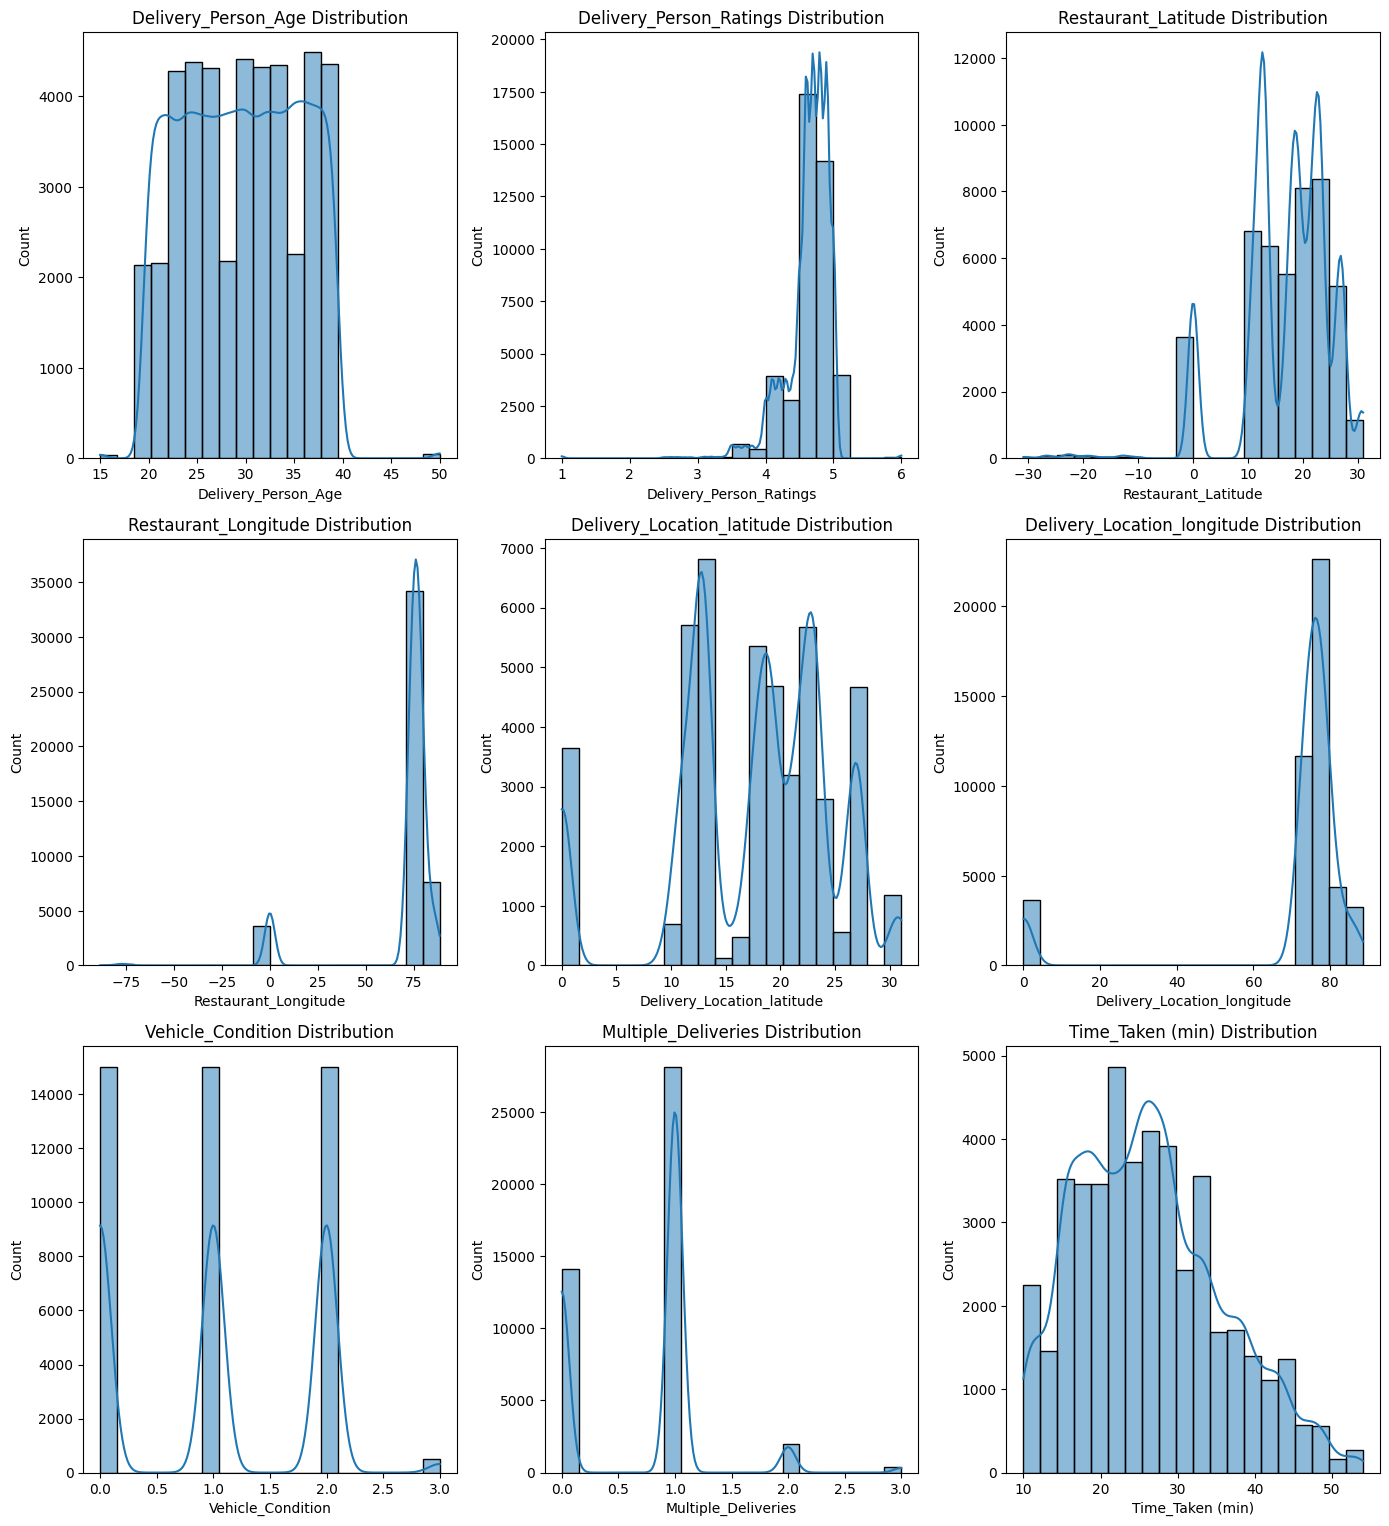


Visualizing Count Distributions (Categorical Columns):


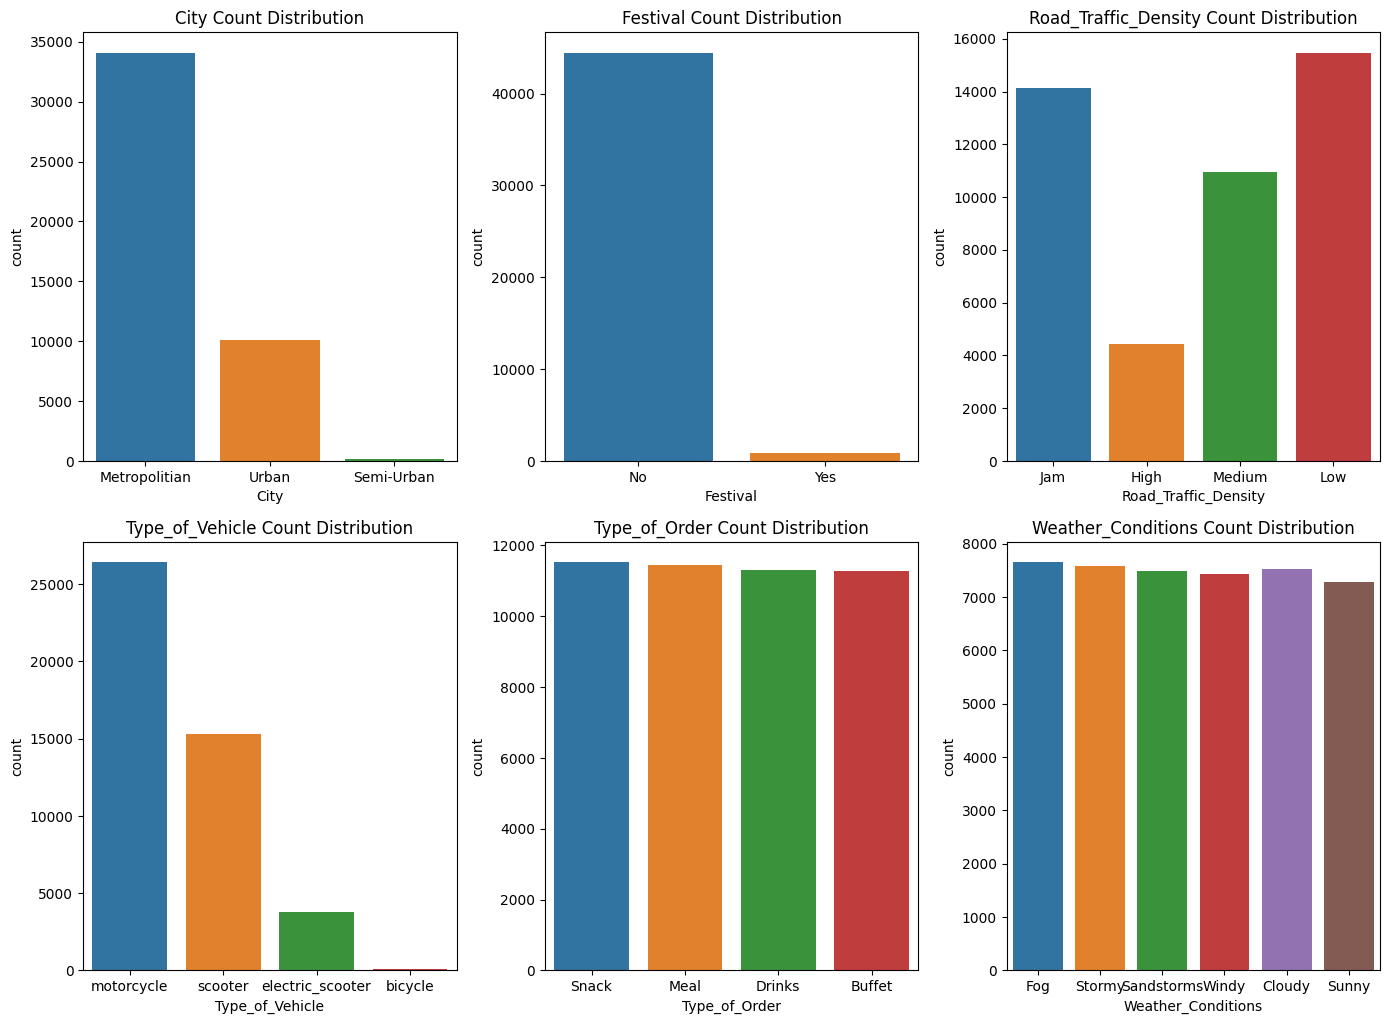

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print("Dataset shape:", df.shape)
df.head()

# Check the data types of each column
print("\nData Types:")
print(df.dtypes)

# Check for missing values in the dataset
print("\nMissing Values:")
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage', ascending=False)
print(missing_data)

# Summary statistics of the entire dataset
print("\nSummary Statistics (All Columns):")
print(df.describe(include='all').T)

# Summary statistics for numerical columns
print("\nSummary Statistics (Numerical Columns):")
numerical_columns = df.select_dtypes(include=[np.number])
print(numerical_columns.describe().T)

# Summary statistics for non-numerical columns
print("\nSummary Statistics (Non-Numerical Columns):")
non_numerical_columns = df.select_dtypes(exclude=[np.number])
print(non_numerical_columns.describe().T)

# Display unique values for each categorical column
print("\nUnique Values (Categorical Columns):")
unique_values = non_numerical_columns.nunique()
print(unique_values)

# Visualize distributions for numerical columns
print("\nVisualizing Distributions (Numerical Columns):")
num_cols = 3
num_rows = (len(numerical_columns.columns) // num_cols) + 1
plt.figure(figsize=(14, 5 * num_rows))

for i, col in enumerate(numerical_columns.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

# Visualize count distributions for selected categorical columns
selected_categorical_columns = ['City', 'Festival', 'Road_Traffic_Density', 'Type_of_Vehicle', 'Type_of_Order', 'Weather_Conditions']
num_cols = 3
num_rows = (len(selected_categorical_columns) // num_cols) + 1

print("\nVisualizing Count Distributions (Categorical Columns):")
plt.figure(figsize=(14, 5 * num_rows))

for i, col in enumerate(selected_categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Count Distribution')

plt.tight_layout()
plt.show()


# Data Cleaning

- **Step 1:** Import the required libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`).
- **Step 2:** Check for missing values in the dataset.
- **Step 3:** Handle missing values:
  - Use the median for numerical columns (`Delivery_Person_Age`).
  - Use the mode for categorical columns (`Weather_Conditions`, `Festival`).
  - Replace missing values in `Multiple_Deliveries` with `0`.
- **Step 4:** Verify that all missing values have been handled.
- **Step 5:** Identify inconsistent time formats in `Time_Orderd` and `Time_Order_Picked`.
- **Step 6:** Clean and convert time columns to a consistent datetime format.
- **Step 7:** Extract relevant values:
  - Numerical values from `Time_Taken (min)`.
  - New column `City_Code` from `Delivery_Person_ID`.
- **Step 8:** Remove duplicate rows from the dataset.
- **Step 9:** Convert date and time columns to appropriate datetime formats.
- **Step 10:** Ensure correct data types:
  - Convert numerical columns (`Delivery_Person_Age`) to float.
  - Convert categorical columns to `category` type for efficiency.
- **Step 11:** Replace string 'NaN' with actual `np.nan` values.
- **Step 12:** Detect and remove outliers:
  - Use valid ranges for latitude and longitude.
  - Apply **IQR method** to remove outliers in numerical columns.
- **Step 13:** Clean categorical columns by:
  - Stripping extra spaces.
  - Converting values to lowercase.
- **Step 14:** Visualize outliers using boxplots for numerical columns.
- **Step 15:** Visualize the distribution of numerical columns using histograms with KDE plots.
- **Step 16:** Visualize the distribution of categorical columns using count plots.


Columns with missing values:
Delivery_Person_Age        1854
Delivery_Person_Ratings    1908
Time_Orderd                1731
Weather_Conditions          616
Road_Traffic_Density        601
Multiple_Deliveries         993
Festival                    228
City                       1200
dtype: int64

Remaining missing values:
Delivery_Order_ID                 0
Delivery_Person_ID                0
Delivery_Person_Age               0
Delivery_Person_Ratings           0
Restaurant_Latitude               0
Restaurant_Longitude              0
Delivery_Location_latitude        0
Delivery_Location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_Picked                 0
Weather_Conditions                0
Road_Traffic_Density              0
Vehicle_Condition                 0
Type_of_Order                     0
Type_of_Vehicle                   0
Multiple_Deliveries               0
Festival                          0
City                       

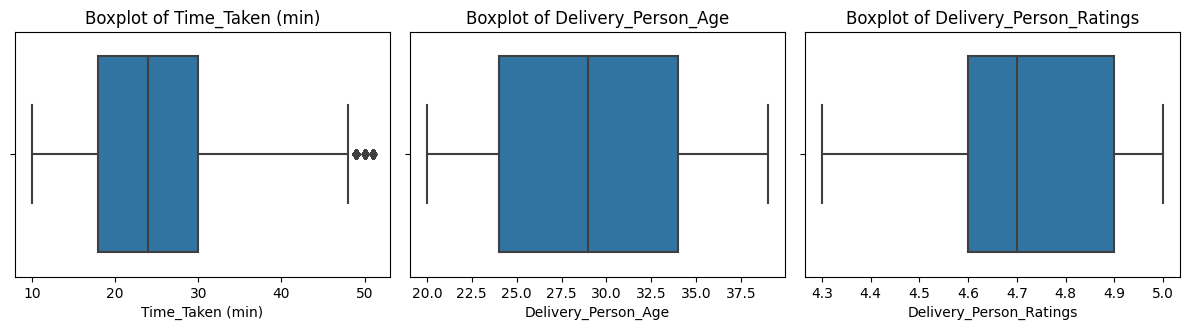

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


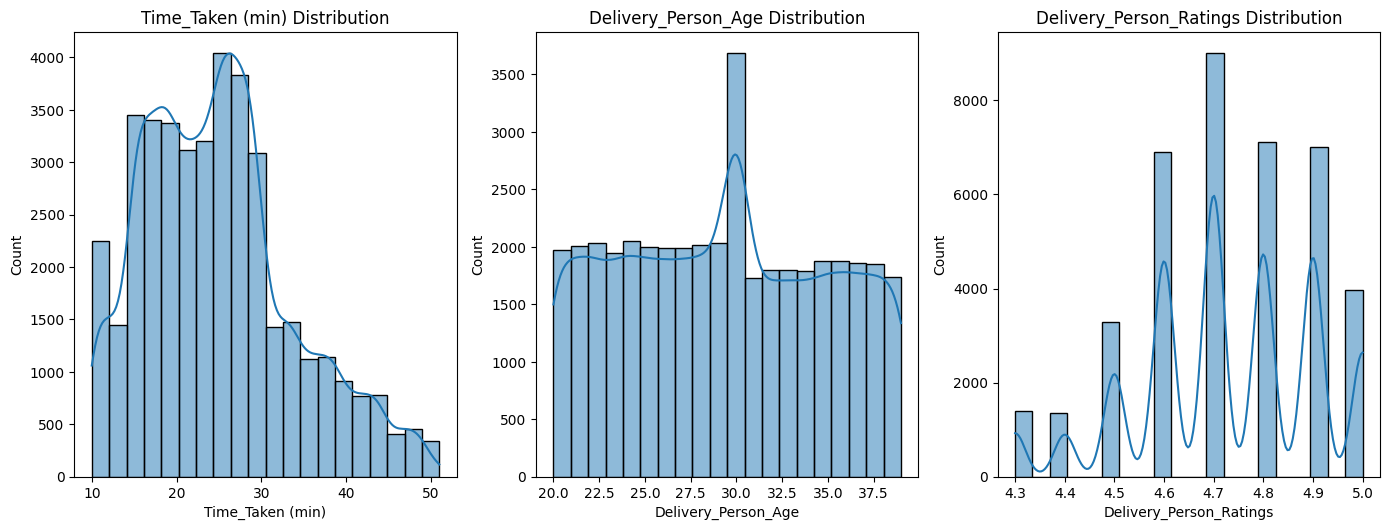

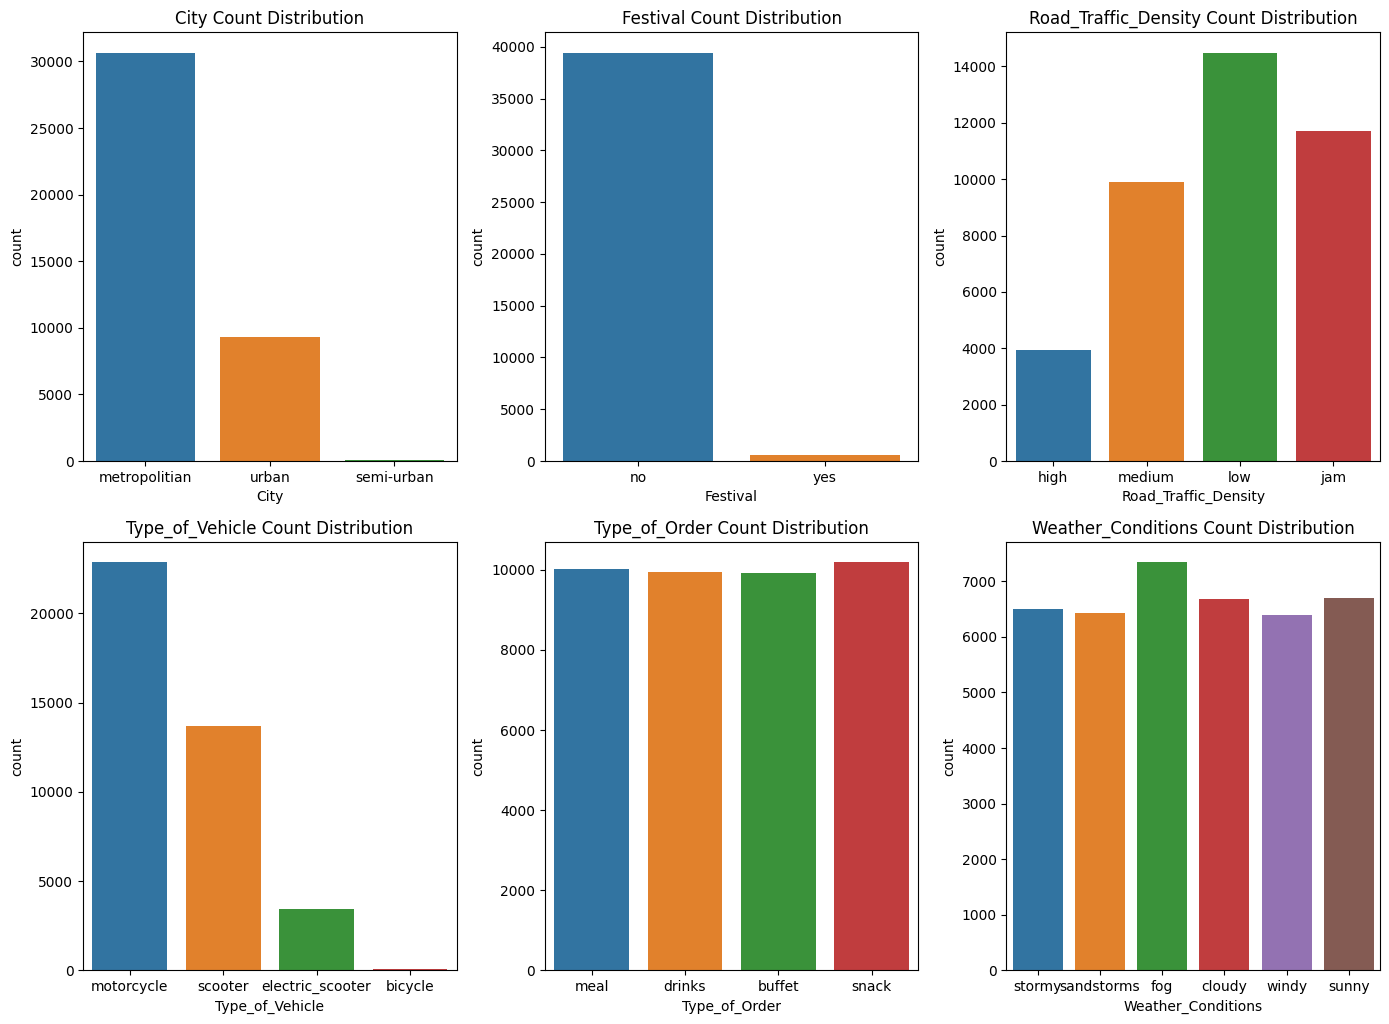

In [5]:
# Data Cleaning and Preparation Process

# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Handling Missing Values
# - Identify columns with missing values
# - Fill missing values based on data characteristics
missing_values = df.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Fill missing values for numerical and categorical columns
df['Delivery_Person_Age'].fillna(df['Delivery_Person_Age'].median(), inplace=True)
df['Delivery_Person_Ratings'].fillna(df['Delivery_Person_Ratings'].median(), inplace=True)
df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0], inplace=True)
df['Road_Traffic_Density'].fillna(df['Road_Traffic_Density'].mode()[0], inplace=True)
df['Multiple_Deliveries'].fillna(0, inplace=True)
df['Festival'].fillna('No', inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)

print("\nRemaining missing values:")
print(df.isnull().sum())

# Step 2: Cleaning Time Columns
# - Check unique formats in time columns
# - Define a function to clean time formats and handle anomalies
time_picked_formats = df['Time_Order_Picked'].unique()
time_ordered_formats = df['Time_Orderd'].unique()

print("\nUnique formats in Time_Order_Picked column:")
print(time_picked_formats)
print("\nUnique formats in Time_Orderd column:")
print(time_ordered_formats)

def clean_time_column(column):
    column = column.astype(str)  # Convert to string for processing
    column = column.apply(lambda x: np.nan if x.replace('.', '', 1).isdigit() else x)
    column = pd.to_datetime(column, errors='coerce', format='%H:%M', utc=False)
    column = column.apply(lambda x: x.replace(hour=0) if pd.notna(x) and x.hour == 24 else x)
    return column.dt.strftime('%H:%M')

# Apply cleaning function to time columns
df['Time_Order_Picked'] = clean_time_column(df['Time_Order_Picked'])
df['Time_Orderd'] = clean_time_column(df['Time_Orderd'])
print("\nCleaned DataFrame:")
print(df.head())

# Step 3: Extracting Relevant Values from Columns
def extract_column_value(df):
    df['Time_Taken (min)'] = df['Time_Taken (min)'].apply(lambda x: int(x))
    df['Weather_Conditions'] = df['Weather_Conditions'].apply(lambda x: x.strip())
    df['City_Code'] = df['Delivery_Person_ID'].str.split("RES", expand=True)[0]

extract_column_value(df)
print("\nExtracted columns:")
print(df[['Time_Taken (min)', 'Weather_Conditions', 'City_Code']].head())

# Step 4: Removing Duplicate Rows
df.drop_duplicates(inplace=True)

# Step 5: Converting Columns to Appropriate Data Types
# - Convert date and time columns
# - Ensure numerical columns are of float type
# - Convert categorical columns to 'category' dtype
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y')
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M').dt.time
df['Time_Order_Picked'] = pd.to_datetime(df['Time_Order_Picked'], format='%H:%M').dt.time
df['Delivery_Person_Age'] = df['Delivery_Person_Age'].astype(float)
df['Delivery_Person_Ratings'] = df['Delivery_Person_Ratings'].astype(float)

categorical_columns = ['City', 'Festival', 'Weather_Conditions', 'Road_Traffic_Density', 'Type_of_Order', 'Type_of_Vehicle']
df[categorical_columns] = df[categorical_columns].astype('category')

# Step 6: Converting String 'NaN' to np.nan
def convert_nan(df):
    df.replace('NaN', np.nan, regex=True, inplace=True)

convert_nan(df)

# Step 7: Detecting and Handling Outliers
# - For latitude and longitude using range check
# - For numerical columns using IQR method
def detect_outliers_lat_lon(df):
    df = df[(df['Restaurant_Latitude'] >= -90) & (df['Restaurant_Latitude'] <= 90)]
    df = df[(df['Restaurant_Longitude'] >= -180) & (df['Restaurant_Longitude'] <= 180)]
    return df

df = detect_outliers_lat_lon(df)

def handle_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numerical_columns = ['Time_Taken (min)', 'Delivery_Person_Age', 'Delivery_Person_Ratings']
df = handle_outliers_iqr(df, numerical_columns)

# Step 8: Cleaning Categorical Columns
# - Remove extra spaces and convert to lowercase
def clean_categorical_columns(df, categorical_columns):
    for col in categorical_columns:
        df[col] = df[col].str.strip().str.lower()
    return df

df = clean_categorical_columns(df, categorical_columns)

# Step 9: Visualizing Outliers for Numerical Columns
def visualize_outliers(df, numerical_columns):
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

visualize_outliers(df, numerical_columns)

# Step 10: Visualizing Distributions of Numerical Columns
num_cols = 3
num_rows = (len(numerical_columns) // num_cols) + 1

plt.figure(figsize=(14, 5 * num_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

# Step 11: Visualizing Count Distributions of Selected Categorical Columns
selected_categorical_columns = ['City', 'Festival', 'Road_Traffic_Density', 'Type_of_Vehicle', 'Type_of_Order', 'Weather_Conditions']

num_cols = 3
num_rows = (len(selected_categorical_columns) // num_cols) + 1

plt.figure(figsize=(14, 5 * num_rows))
for i, col in enumerate(selected_categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Count Distribution')

plt.tight_layout()
plt.show()


# Feature Engineering

- **Step 1:** Import the required libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`, `math`).
  - These libraries are essential for data manipulation, statistical calculations, visualizations, and mathematical functions.

- **Step 2:** Extract date features from `Order_Date` column:
  - Extract the day, month, quarter, and year.
  - Add a new column for `day_of_week` and `is_weekend` to identify weekends.
  - This helps to understand temporal patterns, such as order volumes during weekends.

- **Step 3:** Convert time columns (`Time_Orderd`, `Time_Order_Picked`) to a consistent datetime format:
  - The time columns are parsed into proper datetime objects, allowing for easier time-based calculations.

- **Step 4:** Calculate `Order_Preparation_Time`:
  - This is computed by subtracting `Time_Orderd` from `Time_Order_Picked` in minutes.
  - This feature indicates how much time it took to prepare the order before it was picked up.

- **Step 5:** Round `Order_Preparation_Time` to the nearest minute:
  - Rounding makes the data more uniform and avoids minor discrepancies due to seconds.

- **Step 6:** Calculate `Travel_Time`:
  - The `Travel_Time` is derived by subtracting `Order_Preparation_Time` from `Time_Taken (min)`.
  - This helps to understand how much time was spent on delivery after the order preparation.

- **Step 7:** Handle negative `Travel_Time` values:
  - If `Travel_Time` is negative (which could happen due to rounding or data anomalies), it is set to `NaN` to ensure valid values.

- **Step 8:** Implement the Haversine formula for calculating the distance between restaurant and delivery location:
  - This formula computes the great-circle distance based on latitude and longitude.
  - It helps in understanding the delivery range and optimizing delivery routes.

- **Step 9:** Calculate `Speed_km_per_hour`:
  - The delivery speed is calculated by dividing the distance by `Time_Taken (min)` and multiplying by 60 to convert minutes to hours.
  - This feature gives insights into how fast the deliveries are being made.

- **Step 10:** Aggregate data by `City_Code`:
  - Group data by `City_Code` and calculate average delivery time, speed, distance, and total orders.
  - This provides an overview of performance across different cities.

- **Step 11:** Bin `Order_Preparation_Time` into categories:
  - The `Order_Preparation_Time` is categorized into bins: Short, Medium, Long, and Very Long.
  - This helps in segmenting orders based on preparation time and enables better analysis.

- **Step 12:** Bin `Distance_km` into categories:
  - The `Distance_km` is divided into bins: Short, Medium, Long, and Very Long.
  - This categorization helps to analyze delivery times and speeds for different distance ranges.

- **Step 13:** Bin the `Time_of_Day` based on `Formatted_Time_Ordered`:
  - The time is categorized into Morning, Afternoon, Evening, and Night.
  - This feature is useful to identify any time-of-day patterns in order volumes and delivery performance.

- **Step 14:** Remove outliers using the IQR method:
  - Outliers are identified for `Distance_km` and `Speed_km_per_hour` using the IQR method.
  - Outliers can skew the analysis, so they are removed for more accurate results.

- **Step 15:** Plot the relation between `Type_of_Order` and `Order_Preparation_Time`:
  - A bar plot is created to visualize the average order preparation time across different types of orders.
  - This helps identify any trends or outliers based on the type of order.

- **Step 16:** Calculate average preparation time by order type:
  - The average order preparation time is calculated and merged back into the original dataframe.
  - This helps fill missing values in `Time_Orderd` and `Time_Order_Picked`.

- **Step 17:** Backfill missing `Time_Orderd` and `Time_Order_Picked` based on `Avg_Prep_Time_order_type`:
  - For missing time values, the missing columns are backfilled using the average preparation time per order type.
  - This ensures that the dataset has complete time-related information.

- **Step 18:** Recalculate `Order_Preparation_Time` after backfilling:
  - After filling missing time columns, `Order_Preparation_Time` is recalculated to ensure consistency across the dataset.

- **Step 19:** Recalculate `Travel_Time`:
  - After recalculating `Order_Preparation_Time`, the `Travel_Time` is recomputed for consistency.

- **Step 20:** Bin `Order_Preparation_Time` again after backfilling:
  - The `Order_Preparation_Time` is binned again into categories, ensuring that the newly filled data is included.

- **Step 21:** Calculate `Expected_Delivery_Time`:
  - The expected delivery time is calculated by adding `Time_Taken (min)` to `Time_Orderd`, providing an estimate of when the order should arrive.
  
- **Step 22:** Remove rows with `NaN` values in critical columns:
  - Rows with missing values in important columns such as `Time_Orderd`, `Time_Order_Picked`, `Travel_Time`, and `Prep_Time_Bin` are dropped to ensure clean data.

- **Step 23:** Save the preprocessed and feature-engineered dataset:
  - The final cleaned dataset is saved into a CSV file for further analysis or model training.


# **Newly Created Columns**

### 1. **Order_Preparation_Time**
- **Description:** The time taken (in minutes) to prepare the order before it is picked up by the delivery person.  
- **Formula:** `Order_Preparation_Time = Time_Order_Picked - Time_Orderd`  
- **Data Type:** `float64`

---

### 2. **Travel_Time**
- **Description:** The time taken (in minutes) by the delivery person to travel from the restaurant to the customer’s location.  
- **Formula:** `Travel_Time = Time_Taken (min) - Order_Preparation_Time`  
- **Data Type:** `float64`

---

### 3. **City_Code**
- **Description:** A unique identifier extracted from `Delivery_Person_ID` to represent the city or region of the delivery.  
- **Extraction Logic:** The prefix or first part of `Delivery_Person_ID`  
- **Data Type:** `object`

---

### 4. **Distance_km**
- **Description:** The distance (in kilometers) between the restaurant and the delivery location.  
- **Formula:** Calculated using the **Haversine formula** based on `Restaurant_Latitude`, `Restaurant_Longitude`, `Delivery_Location_latitude`, and `Delivery_Location_longitude`.  
- **Data Type:** `float64`

---

### 5. **Speed_km_per_hour**
- **Description:** The speed (in kilometers per hour) at which the delivery person traveled.  
- **Formula:** `Speed_km_per_hour = (Distance_km / Travel_Time) * 60`  
- **Data Type:** `float64`

---

### 6. **day_of_week**
- **Description:** The day of the week on which the order was placed.  
- **Extraction Logic:** Extracted from the `Order_Date` column  
- **Data Type:** `category`

---

### 7. **is_weekend**
- **Description:** Indicates whether the order was placed on a weekend or not.  
- **Values:**  
  - `1` for weekends  
  - `0` for weekdays  
- **Data Type:** `int64`

---

### 8. **Time_of_Day**
- **Description:** Categorizes the time of order into different periods of the day.  
- **Categories:**  
  - `Morning`, `Afternoon`, `Evening`, `Night`  
- **Extraction Logic:** Based on the hour extracted from `Time_Orderd`  
- **Data Type:** `category`

---

### 9. **Prep_Time_Bin**
- **Description:** Categorizes `Order_Preparation_Time` into different bins to represent short, medium, long, and very long preparation times.  
- **Categories:**  
  - Short: 0-10 minutes  
  - Medium: 10-20 minutes  
  - Long: 20-30 minutes  
  - Very Long: 30+ minutes  
- **Data Type:** `category`

---

### 10. **Distance_Bin**
- **Description:** Categorizes `Distance_km` into different bins to represent short, medium, long, and very long distances.  
- **Categories:**  
  - Short: 0-3 km  
  - Medium: 3-6 km  
  - Long: 6-9 km  
  - Very Long: 9+ km  
- **Data Type:** `category`

---

### 11. **Expected_Delivery_Time**
- **Description:** The expected delivery time calculated by adding `Time_Taken (min)` to `Time_Orderd`.  
- **Formula:** `Expected_Delivery_Time = Time_Orderd + Time_Taken (min)`  
- **Data Type:** `datetime64[ns]`

---

### 12. **Avg_Prep_Time_order_type**
- **Description:** The average order preparation time for each `Type_of_Order`, calculated and used for backfilling missing time values.  
- **Data Type:** `float64`


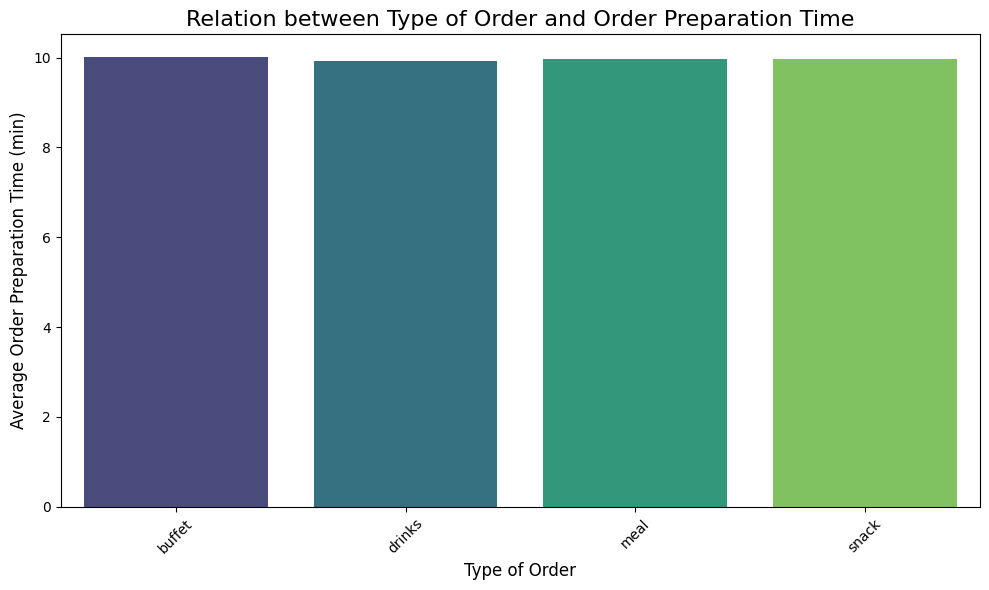

In [6]:
# Steps Performed:

# **Step 1:** Import necessary libraries
# - Importing libraries like `numpy`, `pandas`, `matplotlib`, `seaborn`, and others 
#   to handle data manipulation, mathematical calculations, and visualization.
import numpy as np
import pandas as pd
from math import radians, sin, cos, sqrt, atan2
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 2:** Extract Date Features
# - Extract various date-related features from the `Order_Date` column like `day`, `month`, `quarter`, 
#   `year`, `day_of_week`, and `is_weekend`.
def extract_date_features(data):
    data["day"] = data.Order_Date.dt.day
    data["month"] = data.Order_Date.dt.month
    data["quarter"] = data.Order_Date.dt.quarter
    data["year"] = data.Order_Date.dt.year
    data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5, 6]), 1, 0)

# Apply the function to extract date features
extract_date_features(df)

# **Step 3:** Convert time columns to datetime format
# - `Time_Orderd` and `Time_Order_Picked` columns are converted to datetime format using `pd.to_datetime()`.
#   This step ensures consistent formatting for time-related calculations.
df['Formatted_Time_Ordered'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce')
df['Formatted_Time_Picked'] = pd.to_datetime(df['Time_Order_Picked'], format='%H:%M:%S', errors='coerce')

# **Step 4:** Calculate Order Preparation Time
# - Calculate the time difference between `Time_Orderd` and `Time_Order_Picked` in minutes to represent 
#   the time taken to prepare the order.
df['Order_Preparation_Time'] = (df['Formatted_Time_Picked'] - df['Formatted_Time_Ordered']).dt.total_seconds() / 60

# **Step 5:** Round the Order Preparation Time
# - The calculated preparation time is rounded to the nearest minute for better readability and consistency.
df['Order_Preparation_Time'] = df['Order_Preparation_Time'].round()

# **Step 6:** Calculate Travel Time
# - The travel time is calculated as the difference between `Time_Taken (min)` and `Order_Preparation_Time`. 
#   This represents the time spent traveling to the destination.
df['Travel_Time'] = df['Time_Taken (min)'] - df['Order_Preparation_Time']

# **Step 7:** Handle Negative Travel Time Values
# - In cases where the calculated travel time is negative (which could be a data error), replace it with NaN.
df['Travel_Time'] = df['Travel_Time'].apply(lambda x: x if x >= 0 else np.nan)

# **Step 8:** Haversine Formula to Calculate Distance
# - Use the Haversine formula to calculate the distance between the restaurant and delivery location in kilometers. 
#   This formula accounts for Earth's curvature.
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# Apply Haversine function to calculate distance between restaurant and delivery location
df['Distance_km'] = df.apply(lambda row: haversine(row['Restaurant_Latitude'], 
                                                   row['Restaurant_Longitude'], 
                                                   row['Delivery_Location_latitude'], 
                                                   row['Delivery_Location_longitude']), axis=1)

# **Step 9:** Calculate Speed of Delivery
# - Calculate the speed of delivery by dividing the distance covered by the time taken (in hours).
df['Speed_km_per_hour'] = (df['Distance_km'] / df['Time_Taken (min)']) * 60

# **Step 10:** Group by City and Calculate Aggregates
# - Group data by `City_Code` and calculate average delivery time, average speed, average distance, and total number of orders.
city_aggregates = df.groupby('City_Code').agg({
    'Time_Taken (min)': 'mean',
    'Speed_km_per_hour': 'mean',
    'Distance_km': 'mean',
    'Delivery_Order_ID': 'count'
}).rename(columns={
    'Time_Taken (min)': 'Avg_Delivery_Time',
    'Speed_km_per_hour': 'Avg_Speed',
    'Distance_km': 'Avg_Distance',
    'Delivery_Order_ID': 'Total_Orders'
}).reset_index()

# Display the city aggregates
city_aggregates.head()

# **Step 11:** Bin Order Preparation Time
# - Bin the `Order_Preparation_Time` into categories such as 'Short', 'Medium', 'Long', 'Very Long' 
#   based on predefined intervals to provide a better understanding of preparation time distributions.
df['Prep_Time_Bin'] = pd.cut(df['Order_Preparation_Time'], 
                             bins=[0, 10, 20, 30, np.inf], 
                             labels=['Short', 'Medium', 'Long', 'Very Long'], 
                             right=True)

# **Step 12:** Check for Missing Values in Prep Time Bins
# - Check for any NaN values in the `Prep_Time_Bin` column, which may have been created due to data inconsistencies.
df['Prep_Time_Bin'].isna().sum()

# **Step 13:** Bin Distance
# - Bin the `Distance_km` into categories such as 'Short', 'Medium', 'Long', 'Very Long' based on predefined intervals.
df['Distance_Bin'] = pd.cut(df['Distance_km'], bins=[0, 5, 10, 20, np.inf], labels=['Short', 'Medium', 'Long', 'Very Long'])

# **Step 14:** Bin Time of Day
# - Based on the hour of `Time_Orderd`, classify the orders into different time categories such as 'Morning', 'Afternoon', 'Evening', and 'Night'.
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['Formatted_Time_Ordered'].dt.hour.apply(time_of_day)

# **Step 15:** Remove Outliers Using IQR Method
# - Use the Interquartile Range (IQR) method to detect and remove outliers in the `Distance_km` and `Speed_km_per_hour` columns.
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Apply outlier removal for `Distance_km` and `Speed_km_per_hour`
columns_to_check = ['Distance_km', 'Speed_km_per_hour']
for col in columns_to_check:
    df = remove_outliers(df, col)

# **Step 16:** Visualize Data
# - Visualize the relationship between `Type_of_Order` and `Order_Preparation_Time` using a bar plot to better understand how order type impacts preparation time.
order_type_preptime_relation = df.groupby('Type_of_Order')['Order_Preparation_Time'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Type_of_Order', y='Order_Preparation_Time', data=order_type_preptime_relation, palette='viridis')
plt.title('Relation between Type of Order and Order Preparation Time', fontsize=16)
plt.xlabel('Type of Order', fontsize=12)
plt.ylabel('Average Order Preparation Time (min)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Step 17:** Calculate Average Preparation Time per Order Type
# - Group data by `Type_of_Order` to calculate the average preparation time for each order type and merge this information back into the original dataframe.
avg_prep_time_by_order = df.groupby('Type_of_Order')['Order_Preparation_Time'].mean().reset_index()
avg_prep_time_by_order.columns = ['Type_of_Order', 'Avg_Prep_Time_order_type']
df = df.merge(avg_prep_time_by_order, on='Type_of_Order', how='left')

# **Step 18:** Handle Missing Time Columns Using Avg Prep Time
# - Backfill missing values in the `Time_Orderd` and `Time_Order_Picked` columns using the calculated average preparation time for each order type.
df['Time_Orderd'] = np.where(df['Time_Orderd'].isnull(),
                             (pd.to_datetime(df['Time_Order_Picked'], format='%H:%M:%S') - pd.to_timedelta(df['Avg_Prep_Time_order_type'], unit='m')).dt.strftime('%H:%M:%S'),
                             df['Time_Orderd'])

df['Time_Order_Picked'] = np.where(df['Time_Order_Picked'].isnull(),
                                    (pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S') + pd.to_timedelta(df['Avg_Prep_Time_order_type'], unit='m')).dt.strftime('%H:%M:%S'),
                                    df['Time_Order_Picked'])

# **Step 19:** Recalculate Time Columns and Prepare Final Dataset
# - Recalculate the preparation time and travel time based on backfilled `Time_Orderd` and `Time_Order_Picked` values.
df['Formatted_Time_Ordered'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce')
df['Formatted_Time_Picked'] = pd.to_datetime(df['Time_Order_Picked'], format='%H:%M:%S', errors='coerce')
df['Order_Preparation_Time'] = (df['Formatted_Time_Picked'] - df['Formatted_Time_Ordered']).dt.total_seconds() / 60
df['Order_Preparation_Time'] = df['Order_Preparation_Time'].round()
df['Travel_Time'] = df['Time_Taken (min)'] - df['Order_Preparation_Time']
df['Travel_Time'] = df['Travel_Time'].apply(lambda x: x if x >= 0 else np.nan)

# **Step 20:** Calculate Expected Delivery Time
# - Calculate the expected delivery time by adding `Time_Taken (min)` to `Time_Orderd`.
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S')
df['Expected_Delivery_Time'] = df['Time_Orderd'] + df['Time_Taken (min)'].apply(lambda x: timedelta(minutes=x))
df['Expected_Delivery_Time'] = df['Expected_Delivery_Time'].dt.strftime('%H:%M:%S')

# **Step 21:** Remove NaN Values in Critical Columns
# - Drop rows that have NaN values in critical columns like `Time_Orderd`, `Time_Order_Picked`, `Travel_Time`, and `Prep_Time_Bin`.
df = df.dropna(subset=['Time_Orderd', 'Time_Order_Picked', 'Travel_Time', 'Prep_Time_Bin'])

# **Step 22:** Save the Cleaned Dataset
# - Save the cleaned dataset into a new file for further analysis.
df.to_csv("cleaned_delivery_data.csv", index=False)


Exploratory Data Analysis

# Exploratory Data Analysis

- **Step 1:** Import the required libraries (`matplotlib`, `seaborn`, `pandas`, `scipy.stats`).
- **Step 2:** Set the plot style using `sns.set()` and define a color palette (`sns.color_palette('Set2')`).
- **Step 3:** Load the cleaned dataset (`df = pd.read_csv('your_dataset.csv')`).
- **Step 4:** Define categorical features to plot and analyze (`categorical_features_plot` and `categorical_features_anova`).
- **Step 5:** Create a function `display_color_legend()` to display a color legend for categorical features.
- **Step 6:** Perform correlation analysis for numerical features using `sns.heatmap()`.
  - Correlate features like `Delivery_Person_Age`, `Delivery_Person_Ratings`, `Vehicle_Condition`, and `Multiple_Deliveries` with `Time_Taken (min)`.
- **Step 7:** Perform ANOVA to find significant features influencing `Time_Taken (min)`.
  - Group data by categorical features and apply the `f_oneway` method to calculate the p-values.
- **Step 8:** Print significant factors from ANOVA with F-statistic and p-value for each feature.
- **Step 9:** Plot the distribution of `Time_Taken (min)` by each categorical feature.
  - Use `sns.histplot()` with `hue` for categorical features and a `kde` plot for smooth distribution.
  - Call `display_color_legend()` to show the color legend for each plot.
- **Step 10:** Perform ANOVA for each categorical feature (like `City_Code`, `Distance_Bin`, `Weather_Conditions`).
  - Use `f_oneway()` and store results in a dictionary.
- **Step 11:** Print ANOVA results (F-statistic and p-value for each categorical feature).
- **Step 12:** Plot boxplots to analyze the distribution of `Time_Taken (min)` by various categorical features:
  - `City_Code`
  - `Time_of_Day`
  - `Distance_Bin`
- **Step 13:** Plot a bar plot for the average `Time_Taken (min)` by `Road_Traffic_Density`.
  - Use `sns.barplot()` to visualize the relationship.
- **Step 14:** Plot a violin plot for the distribution of `Time_Taken (min)` by `Weather_Conditions`.
- **Step 15:** Plot boxplots for `Multiple_Deliveries` vs. `Time_Taken (min)` and `Vehicle_Condition` vs. `Time_Taken (min)`.
- **Step 16:** Plot boxplots for `Delivery_Person_Age` vs. `Time_Taken (min)`to visualize the relationship.


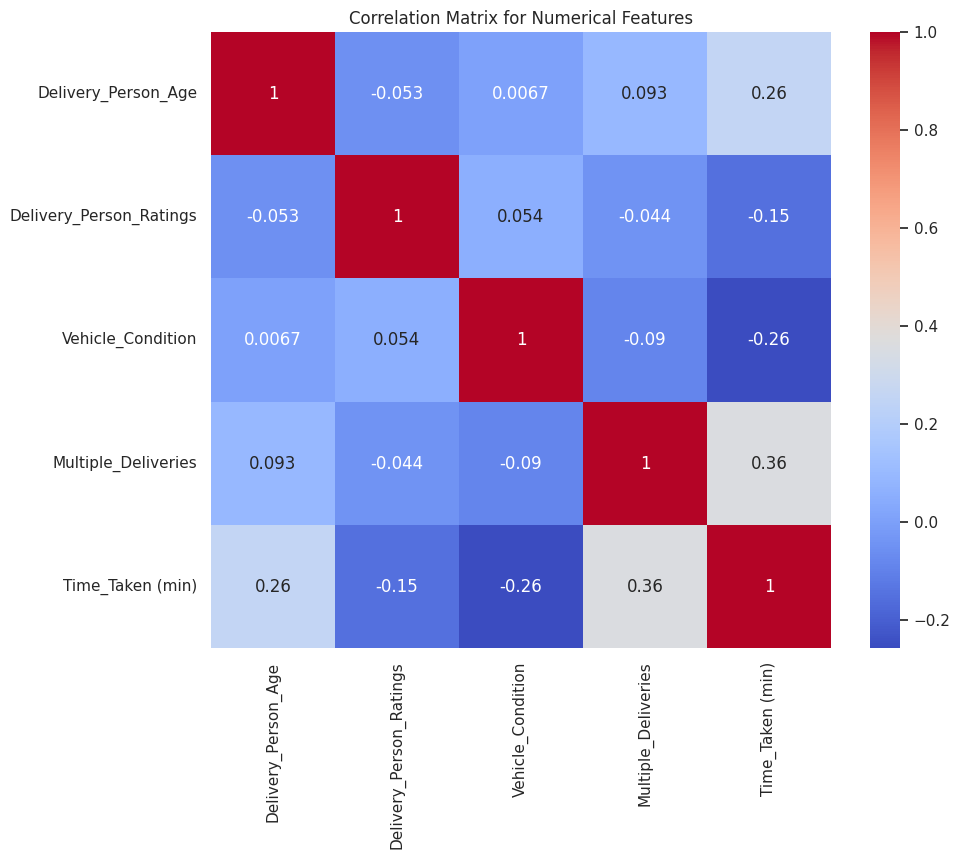

Significant factors influencing Time Taken:
City_Code: F-statistic = 1.5878, p-value = 0.0426
Distance_Bin: F-statistic = 1694.3106, p-value = 0.0000
Weather_Conditions: F-statistic = 455.2255, p-value = 0.0000
Road_Traffic_Density: F-statistic = 2085.4955, p-value = 0.0000
Vehicle_Condition: F-statistic = 1415.5953, p-value = 0.0000
Type_of_Vehicle: F-statistic = 457.8366, p-value = 0.0000
Multiple_Deliveries: F-statistic = 2069.0200, p-value = 0.0000
Time_of_Day: F-statistic = 1039.1319, p-value = 0.0000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


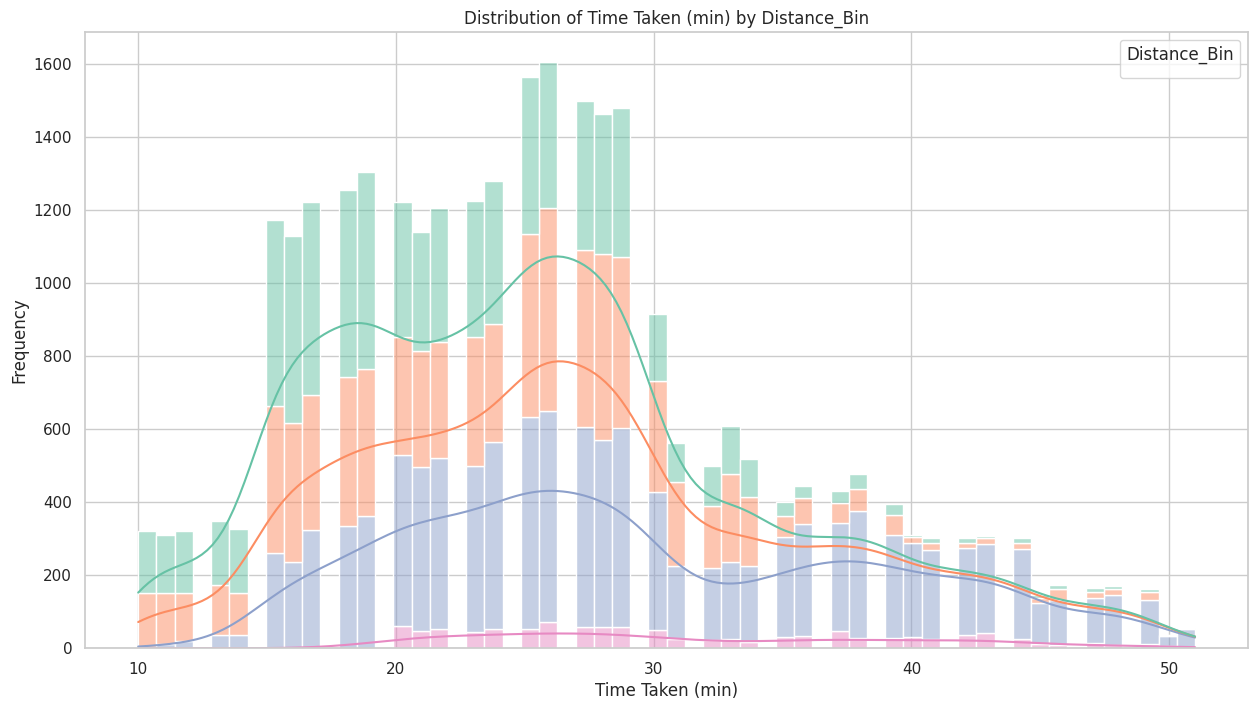

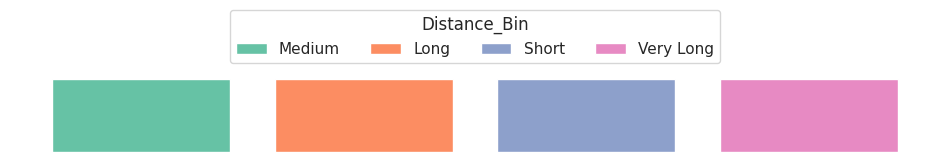

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


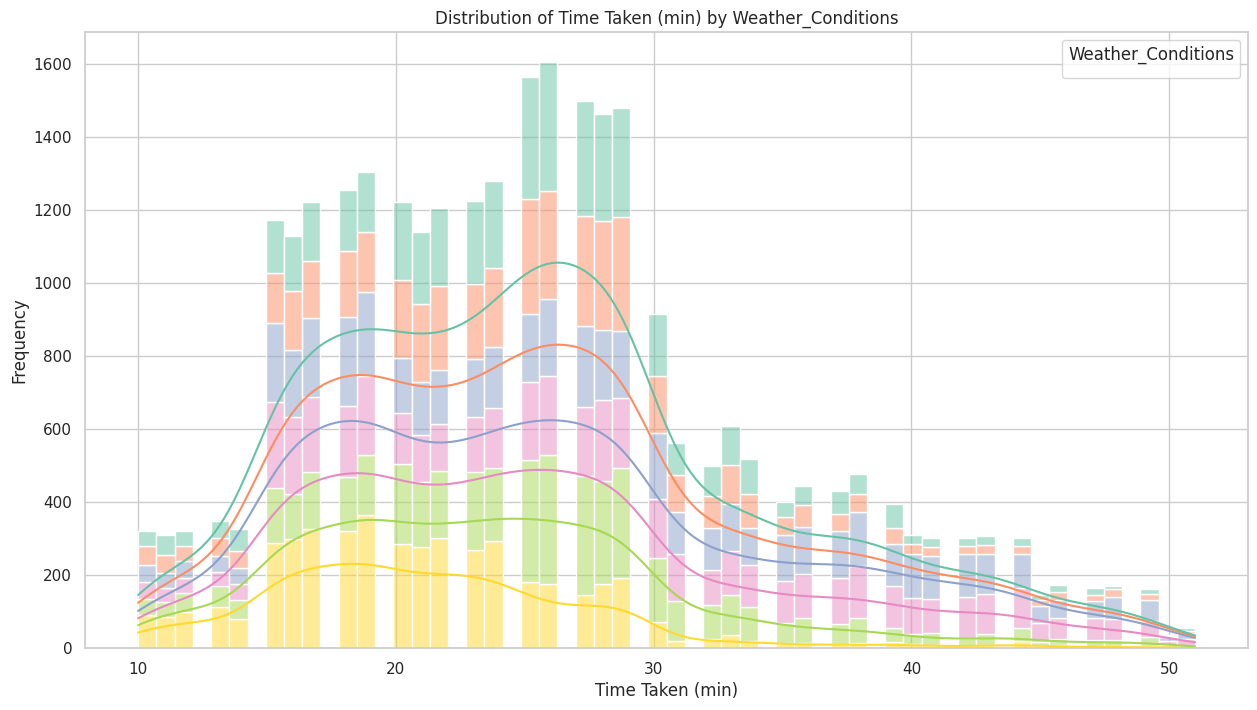

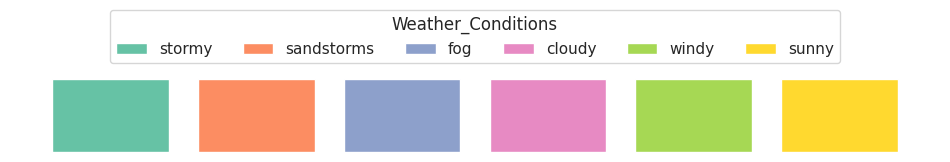

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


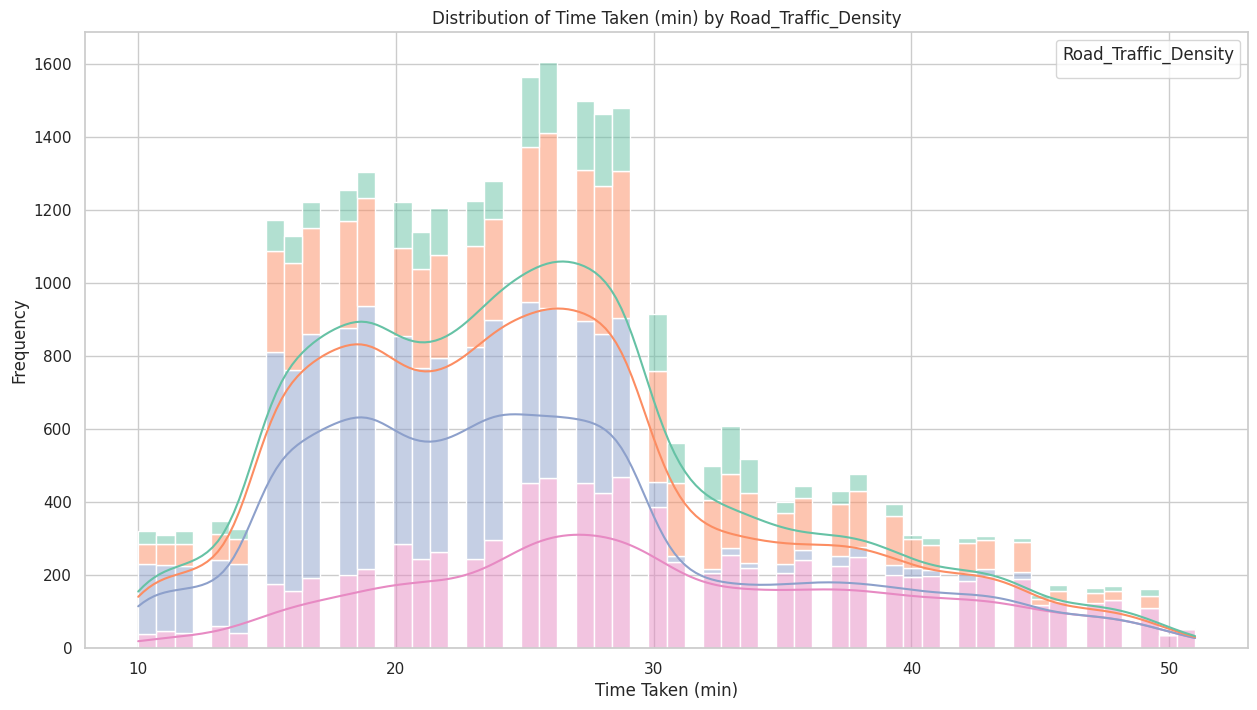

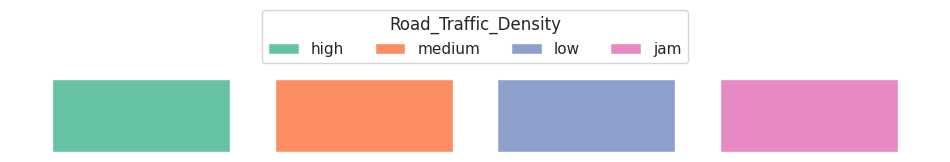

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


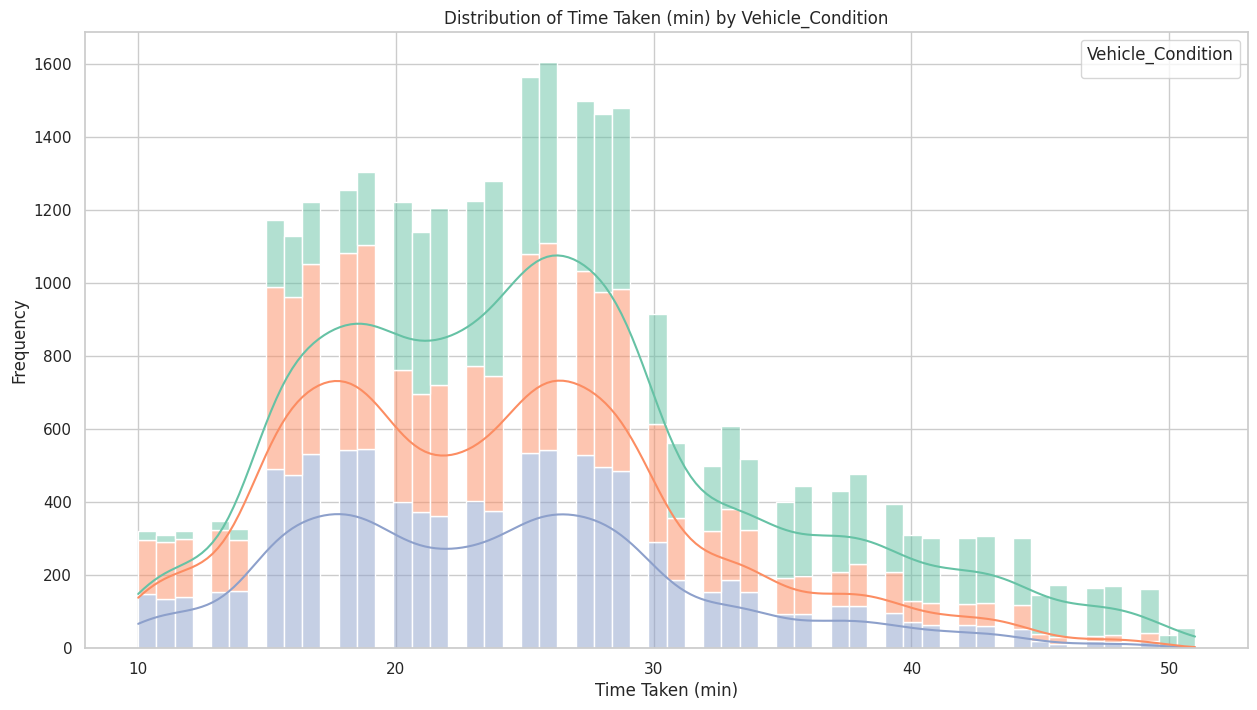

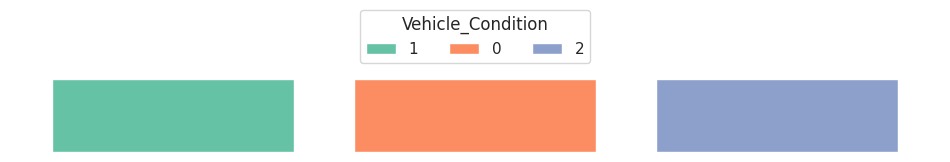

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


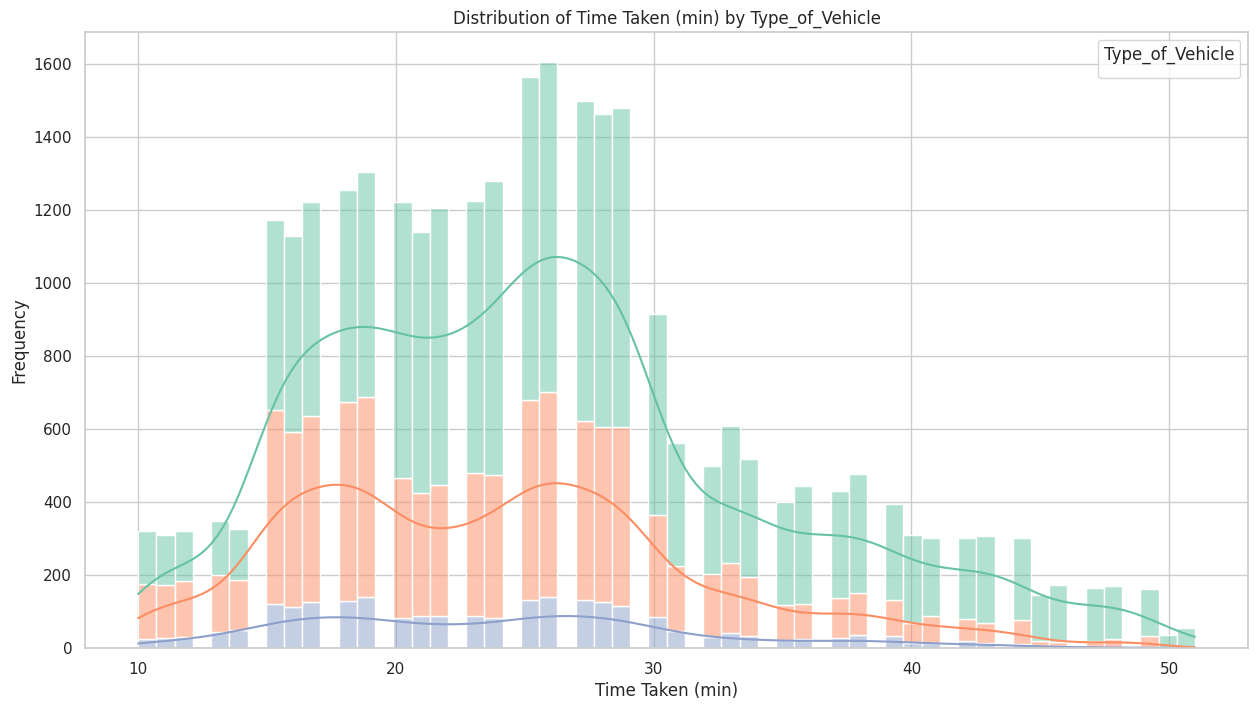

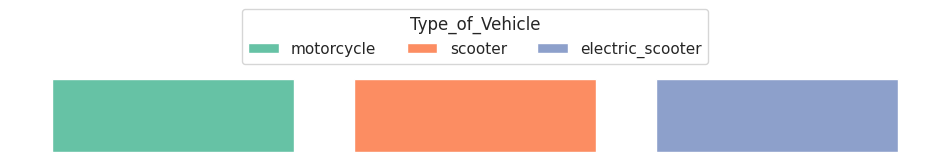

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


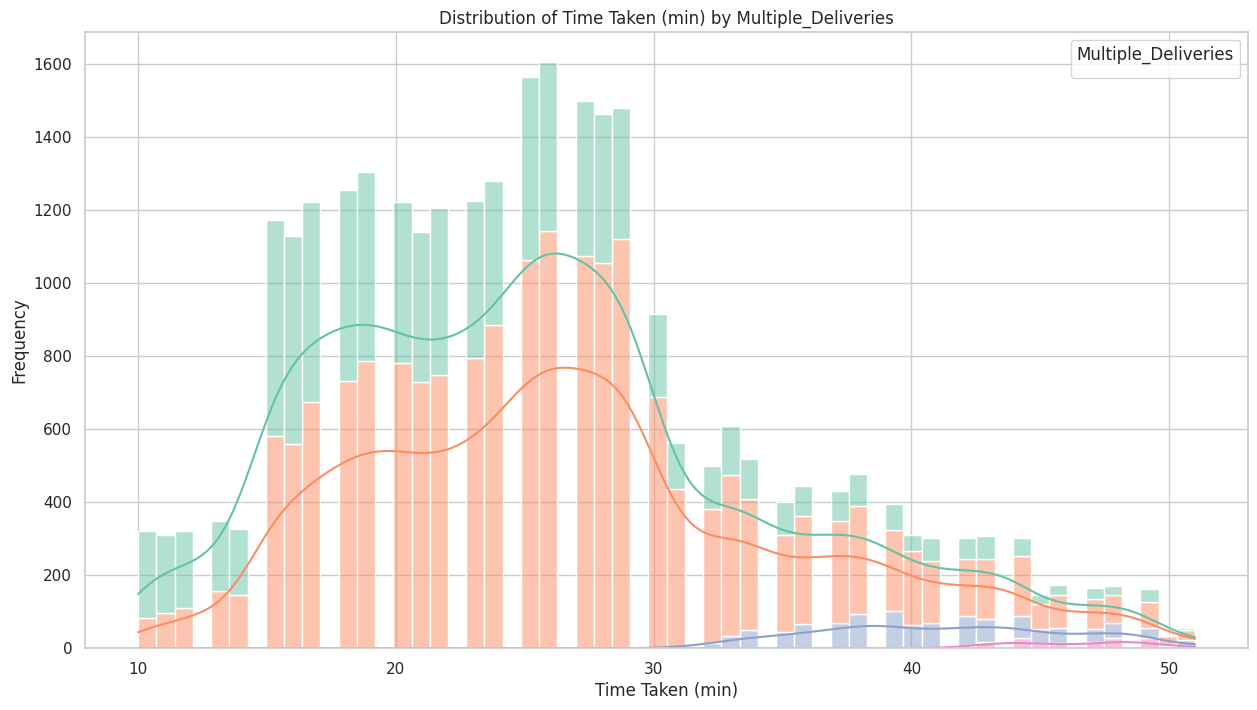

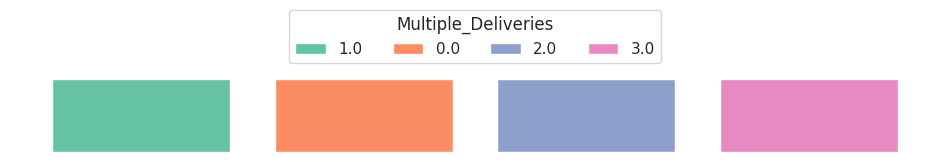

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


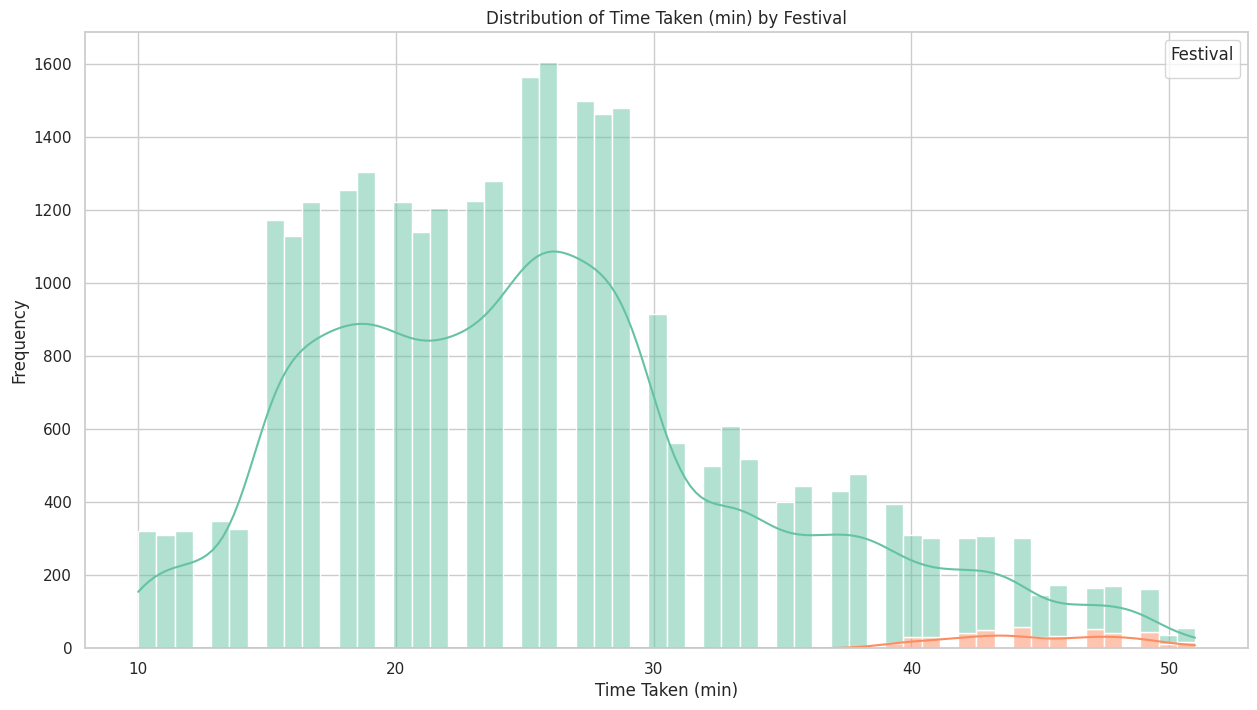

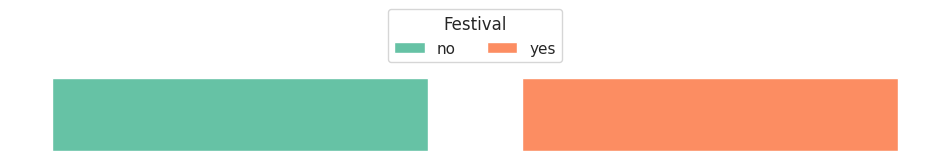

City_Code: F-statistic = 1.5878, p-value = 0.0426
Distance_Bin: F-statistic = 1694.3106, p-value = 0.0000
Weather_Conditions: F-statistic = 455.2255, p-value = 0.0000
Road_Traffic_Density: F-statistic = 2085.4955, p-value = 0.0000
Vehicle_Condition: F-statistic = 1415.5953, p-value = 0.0000
Type_of_Vehicle: F-statistic = 457.8366, p-value = 0.0000
Multiple_Deliveries: F-statistic = 2069.0200, p-value = 0.0000
Time_of_Day: F-statistic = 1039.1319, p-value = 0.0000


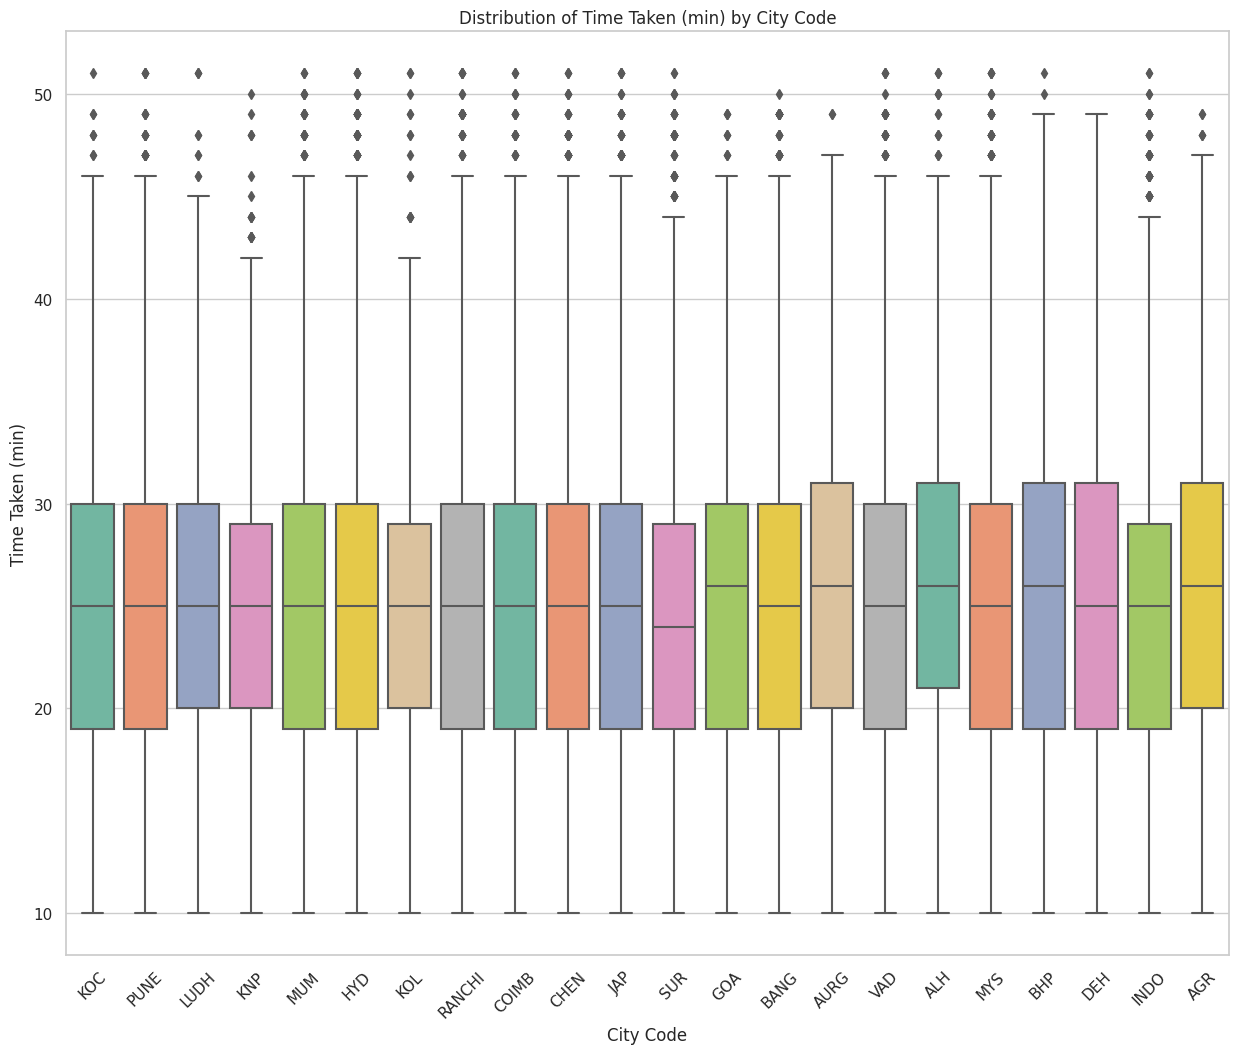

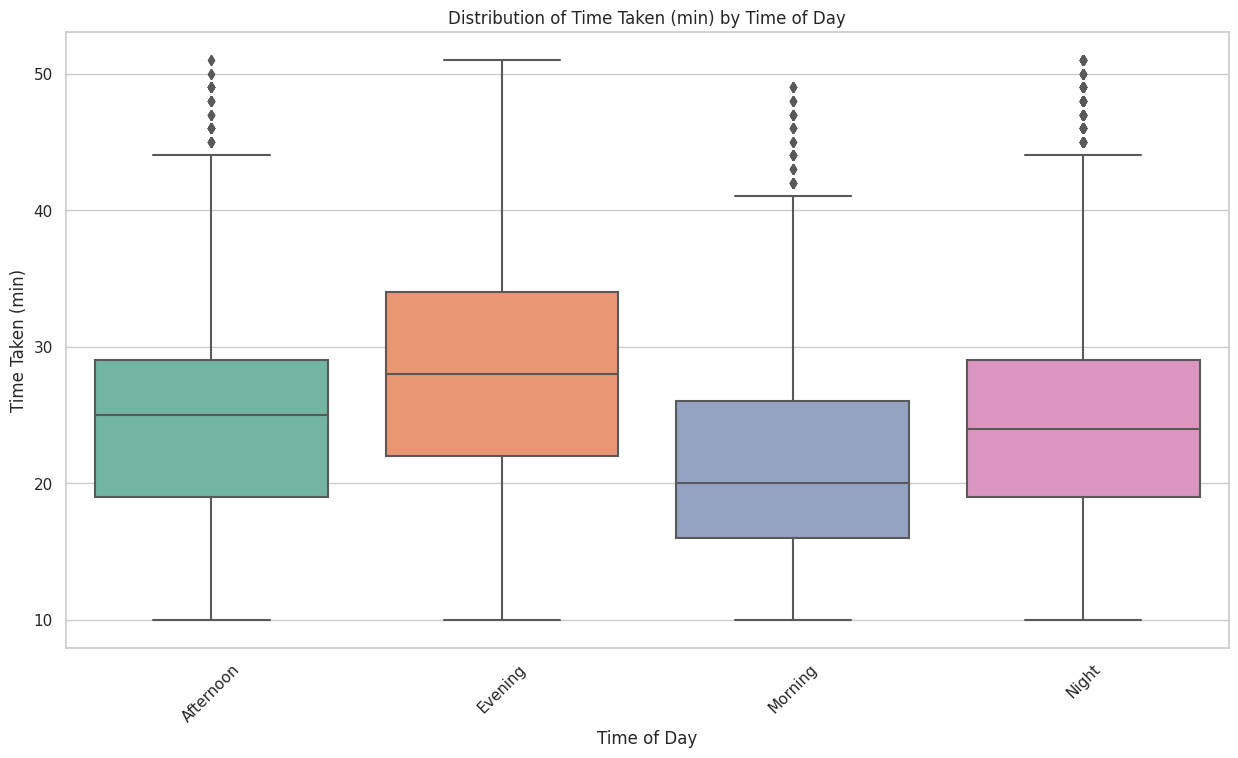

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


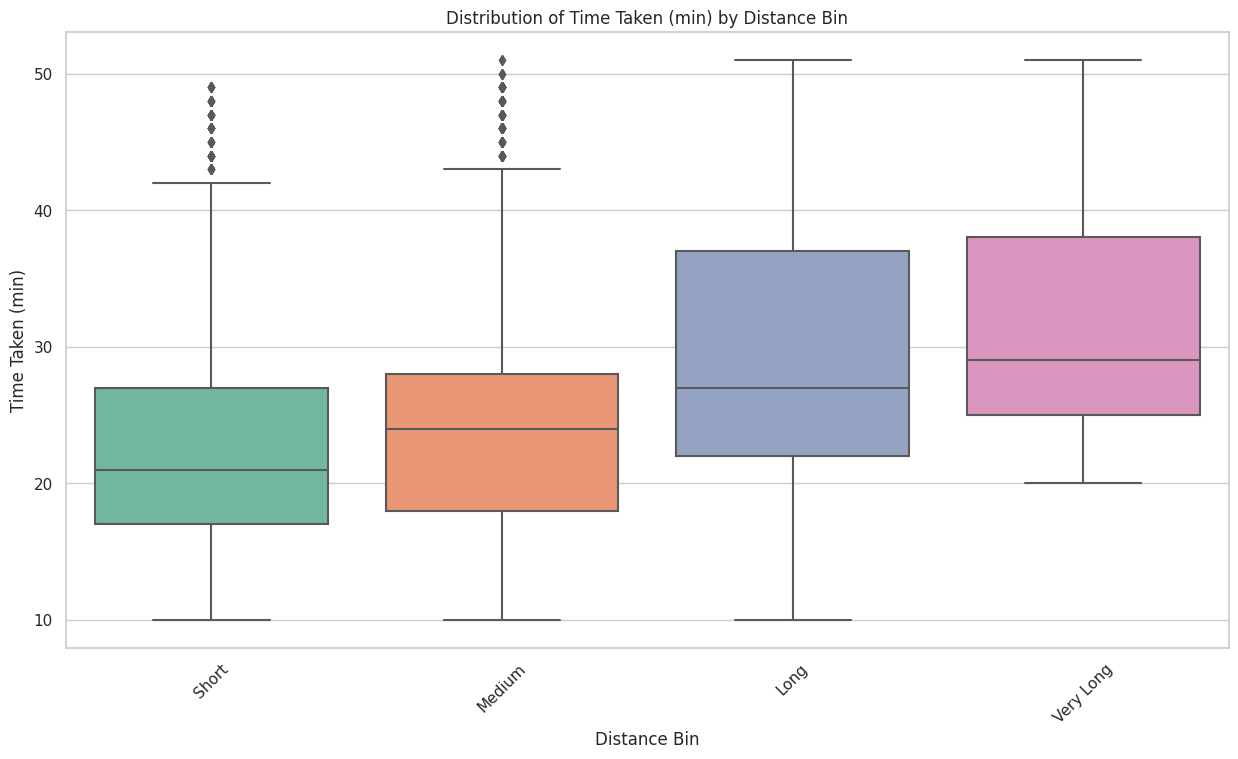

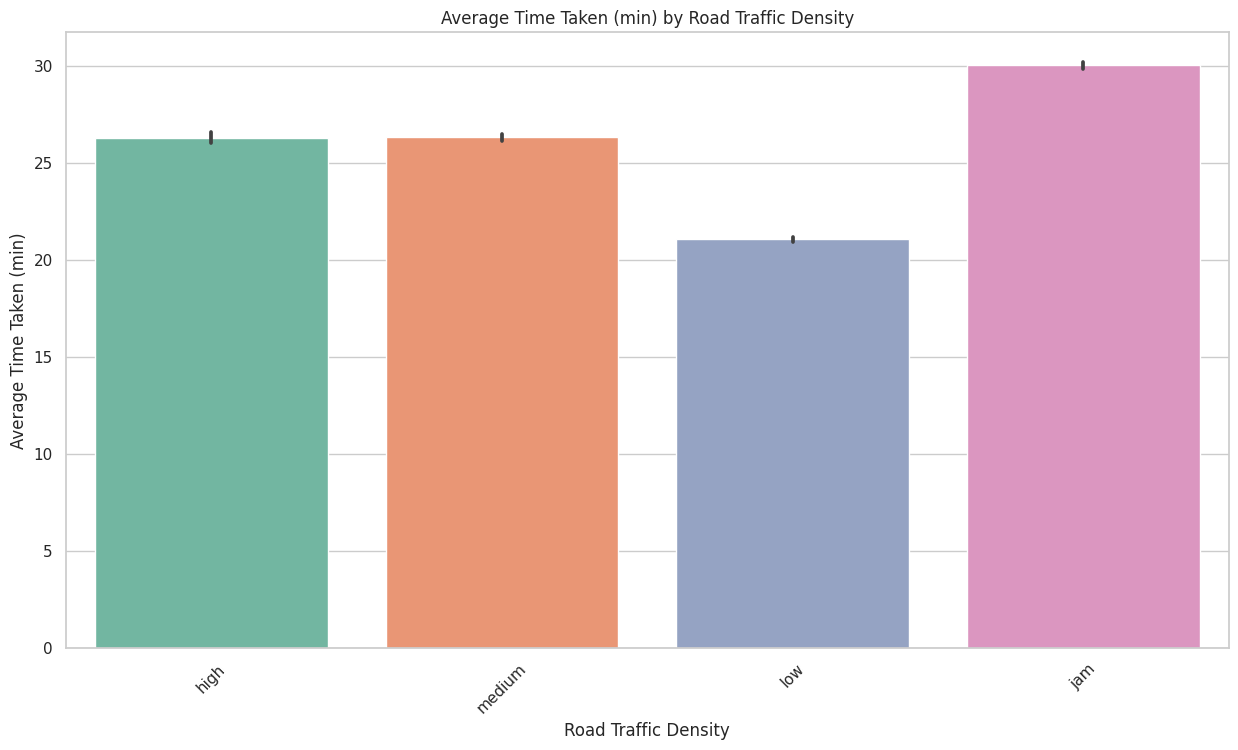

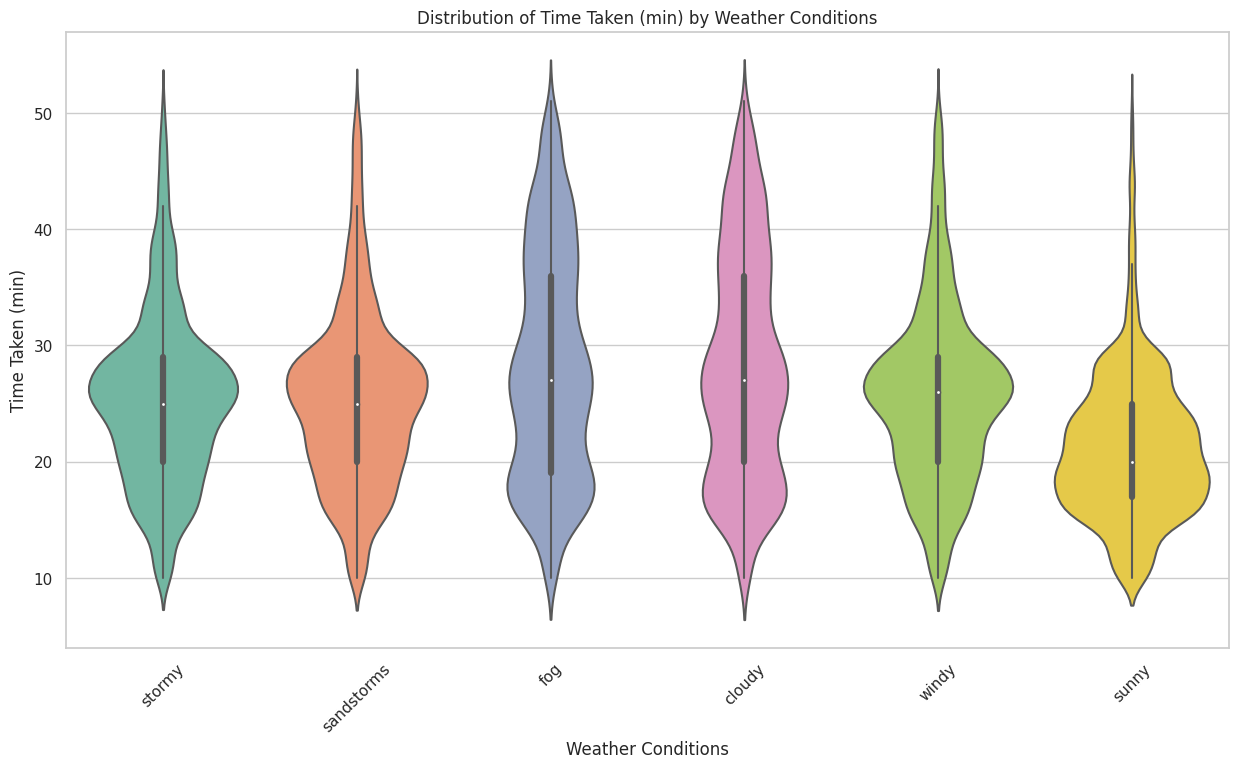

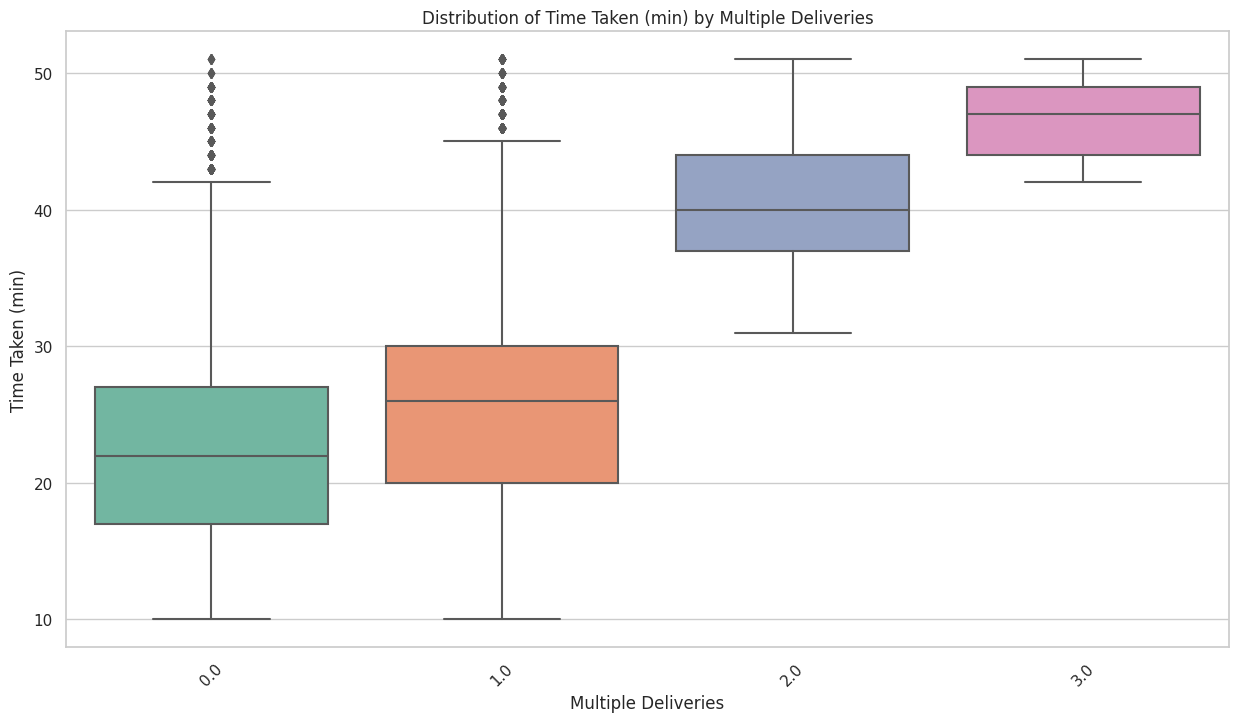

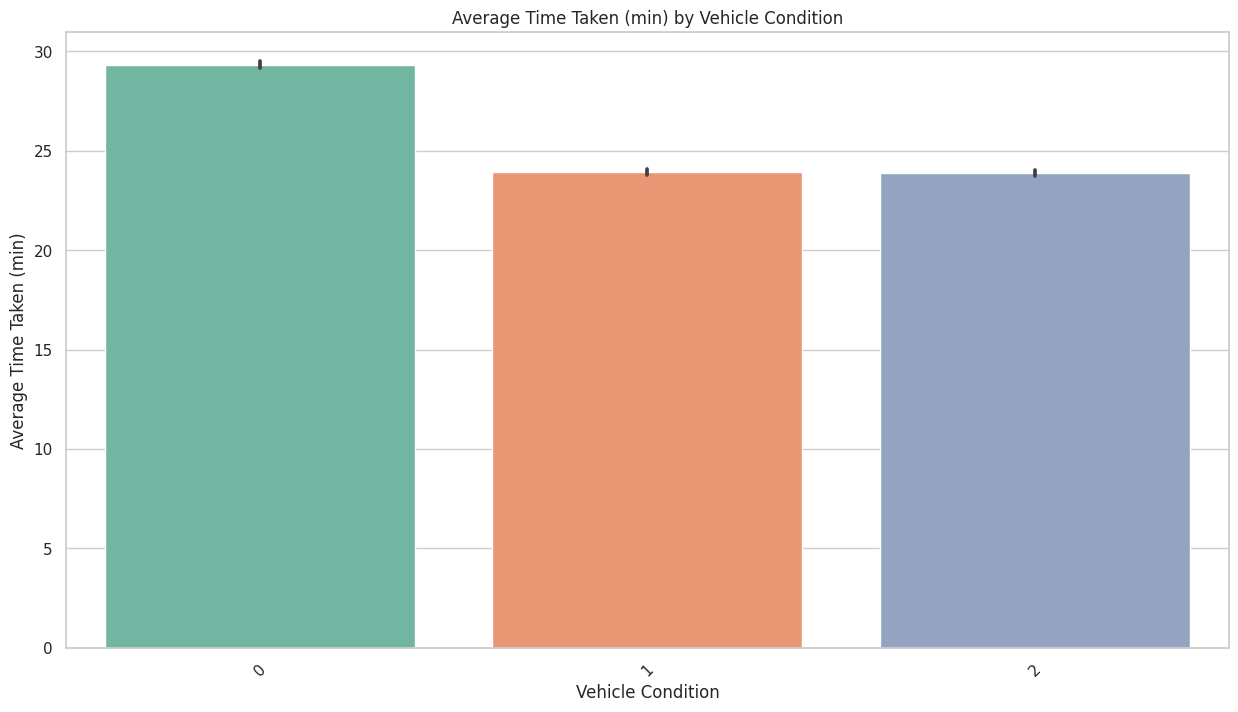

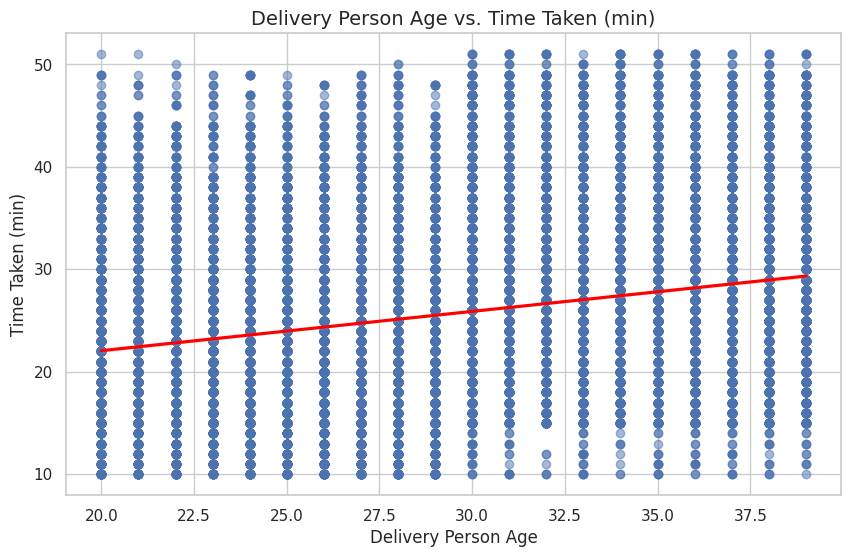

In [7]:
# Exploratory Data Analysis

# Step 1: Import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import f_oneway

# Step 2: Set the plot style and define a color palette
sns.set(style='whitegrid')  # Set the style for the plots
palette = sns.color_palette('Set2')  # Define a color palette for consistent colors

# Step 3: Load the cleaned dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and load your dataset accordingly

# Step 4: Define categorical features for plotting and analyzing
categorical_features_plot = [
    'Distance_Bin', 'Weather_Conditions', 
    'Road_Traffic_Density', 'Vehicle_Condition', 
    'Type_of_Vehicle', 'Multiple_Deliveries', 'Festival'
]

categorical_features_anova = [
    'City_Code', 'Distance_Bin', 'Weather_Conditions', 
    'Road_Traffic_Density', 'Vehicle_Condition', 
    'Type_of_Vehicle', 'Multiple_Deliveries','Time_of_Day'
]

# Step 5: Create a function to display the color legend for categorical features
def display_color_legend(hue_values, title):
    plt.figure(figsize=(12, 1))
    for i, value in enumerate(hue_values):
        plt.bar(i, 1, color=palette[i], label=value)
    plt.legend(title=title, loc='center', bbox_to_anchor=(0.5, 1.5), ncol=len(hue_values))
    plt.axis('off')
    plt.show()

# Step 6: Correlation analysis for numerical features
numerical_features = ['Delivery_Person_Age', 'Delivery_Person_Ratings', 'Vehicle_Condition', 'Multiple_Deliveries']

# Visualize the correlation matrix for the numerical features and 'Time_Taken (min)'
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features + ['Time_Taken (min)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

# Step 7: Perform ANOVA to find significant factors influencing 'Time_Taken (min)'
anova_results = {}

for feature in categorical_features_anova:
    categories = df[feature].unique()  # Get unique categories for each feature
    time_taken_by_category = [df[df[feature] == cat]['Time_Taken (min)'] for cat in categories]  # Group data by category
    anova_result = f_oneway(*time_taken_by_category)  # Perform one-way ANOVA
    anova_results[feature] = anova_result  # Store the results

# Step 8: Print significant factors from ANOVA (p-value < 0.05 indicates significance)
print("Significant factors influencing Time Taken:")
for feature, result in anova_results.items():
    if result.pvalue < 0.05:
        print(f"{feature}: F-statistic = {result.statistic:.4f}, p-value = {result.pvalue:.4f}")

# Step 9: Plot the distribution of 'Time_Taken (min)' by each categorical feature
for feature in categorical_features_plot:
    plt.figure(figsize=(15, 8))

    # Get unique categories for the hue in the plot
    unique_categories = df[feature].unique()

    # Plot the distribution with a stacked histogram and KDE
    sns.histplot(
        data=df, 
        x='Time_Taken (min)', 
        hue=feature, 
        multiple='stack', 
        kde=True, 
        palette=palette[:len(unique_categories)]
    )

    plt.title(f'Distribution of Time Taken (min) by {feature}')
    plt.xlabel('Time Taken (min)')
    plt.ylabel('Frequency')
    plt.legend(title=feature)
    plt.show()

    # Display the color legend for clarity
    display_color_legend(unique_categories, title=feature)

# Step 10: Perform ANOVA for each categorical feature and print results
anova_results = {}  # Reset the dictionary to store ANOVA results

for feature in categorical_features_anova:
    categories = df[feature].unique()  # Get unique categories for each feature
    time_taken_by_category = [df[df[feature] == cat]['Time_Taken (min)'] for cat in categories]  # Group data
    anova_result = f_oneway(*time_taken_by_category)  # Perform one-way ANOVA
    anova_results[feature] = anova_result  # Store the result

# Step 11: Print ANOVA results (F-statistic and p-value for each categorical feature)
for feature, result in anova_results.items():
    print(f"{feature}: F-statistic = {result.statistic:.4f}, p-value = {result.pvalue:.4f}")

# Step 12: Plot boxplots to analyze the distribution of 'Time_Taken (min)' by various categorical features
plt.figure(figsize=(15, 12))
sns.boxplot(data=df, x='City_Code', y='Time_Taken (min)', palette='Set2')
plt.title('Distribution of Time Taken (min) by City Code')
plt.xlabel('City Code')
plt.ylabel('Time Taken (min)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Time_of_Day', y='Time_Taken (min)', palette='Set2')
plt.title('Distribution of Time Taken (min) by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Time Taken (min)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Distance_Bin', y='Time_Taken (min)', palette='Set2')
plt.title('Distribution of Time Taken (min) by Distance Bin')
plt.xlabel('Distance Bin')
plt.ylabel('Time Taken (min)')
plt.xticks(rotation=45)
plt.show()

# Step 13: Plot a bar plot for the average 'Time_Taken (min)' by 'Road_Traffic_Density'
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x='Road_Traffic_Density', y='Time_Taken (min)', palette='Set2')
plt.title('Average Time Taken (min) by Road Traffic Density')
plt.xlabel('Road Traffic Density')
plt.ylabel('Average Time Taken (min)')
plt.xticks(rotation=45)
plt.show()

# Step 14: Plot a violin plot for the distribution of 'Time_Taken (min)' by 'Weather_Conditions'
plt.figure(figsize=(15, 8))
sns.violinplot(data=df, x='Weather_Conditions', y='Time_Taken (min)', palette='Set2')
plt.title('Distribution of Time Taken (min) by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Time Taken (min)')
plt.xticks(rotation=45)
plt.show()

# Step 15: Plot boxplots for 'Multiple_Deliveries' vs. 'Time_Taken (min)' and 'Vehicle_Condition' vs. 'Time_Taken (min)'
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Multiple_Deliveries', y='Time_Taken (min)', palette='Set2')
plt.title('Distribution of Time Taken (min) by Multiple Deliveries')
plt.xlabel('Multiple Deliveries')
plt.ylabel('Time Taken (min)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(data=df, x='Vehicle_Condition', y='Time_Taken (min)', palette='Set2')
plt.title('Average Time Taken (min) by Vehicle Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Average Time Taken (min)')
plt.xticks(rotation=45)
plt.show()

# Step 16: Plot scatter plot to show the relationship between 'Delivery_Person_Age' and 'Time_Taken (min)'

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Delivery_Person_Age', y='Time_Taken (min)', scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

# Titles and labels
plt.title('Delivery Person Age vs. Time Taken (min)', fontsize=14)
plt.xlabel('Delivery Person Age', fontsize=12)
plt.ylabel('Time Taken (min)', fontsize=12)
plt.grid(True)
plt.show()


# Feature Selection 

Through **data cleaning**, **feature engineering**, and **exploratory data analysis**, we have identified and processed the key factors that influence **`Time_Taken`** for deliveries. The most impactful variables include:

1. **Order_Preparation_Time** – Time taken by the restaurant to prepare the order.  
2. **Travel_Time** – Time spent by the delivery person to reach the customer.  
3. **Weather_Conditions** – Environmental factors that may affect delivery speed.  
4. **Road_Traffic_Density** – Traffic levels at the time of delivery.  
5. **Distance** – The geographical distance between the restaurant and the delivery location.  
6. **Vehicle_Condition** – The state of the delivery vehicle, which can affect travel time.  
7. **Time_of_Day** – Deliveries may vary depending on whether they occur in the morning, afternoon, evening, or night.  
8. **City_Code** – Differences in delivery patterns based on city-specific factors.  
9. **Delivery_Person_Age** – The age of the delivery person, which may influence delivery time, as observed through boxplot analysis.

By incorporating these variables into a **machine learning model**, we can develop a robust predictive system capable of accurately forecasting **delivery times for new orders**. This model can:

- **Optimize delivery operations** by allowing real-time tracking and adjustment of delivery schedules.  
- **Improve overall efficiency** by providing reliable expected delivery times, leading to better resource management and customer satisfaction.


# MODEL BUILDING

In [8]:
df.dtypes

Delivery_Order_ID                      object
Delivery_Person_ID                     object
Delivery_Person_Age                   float64
Delivery_Person_Ratings               float64
Restaurant_Latitude                   float64
Restaurant_Longitude                  float64
Delivery_Location_latitude            float64
Delivery_Location_longitude           float64
Order_Date                     datetime64[ns]
Time_Orderd                    datetime64[ns]
Time_Order_Picked                      object
Weather_Conditions                     object
Road_Traffic_Density                   object
Vehicle_Condition                       int64
Type_of_Order                          object
Type_of_Vehicle                        object
Multiple_Deliveries                   float64
Festival                               object
City                                   object
Time_Taken (min)                        int64
City_Code                              object
day                               

# **Data Preprocessing - one hot encoding**

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your dataframe is named df

# Step 1: Convert time columns to AM/PM format
df['Formatted_Time_Ordered'] = pd.to_datetime(df['Formatted_Time_Ordered']).dt.strftime('%I:%M %p')
df['Formatted_Time_Picked'] = pd.to_datetime(df['Formatted_Time_Picked']).dt.strftime('%I:%M %p')
df['Expected_Delivery_Time'] = pd.to_datetime(df['Expected_Delivery_Time']).dt.strftime('%I:%M %p')

# Display the updated time columns
print("Updated time columns:")
print(df[['Formatted_Time_Ordered', 'Formatted_Time_Picked', 'Expected_Delivery_Time']].head())

# Step 2: Select important columns for analysis
important_columns = [
    'Formatted_Time_Ordered', 'Formatted_Time_Picked', 'Expected_Delivery_Time', 
    'Time_Taken (min)', 'Travel_Time', 'Order_Preparation_Time', 'Distance_km', 
    'Weather_Conditions', 'Road_Traffic_Density', 'Multiple_Deliveries', 'Delivery_Person_Age', 
    'Vehicle_Condition', 'Type_of_Order', 'City_Code', 'Time_of_Day', 'Festival', 'is_weekend'
]

# Show the first few rows of selected important columns
print("\nImportant columns:")
print(df[important_columns].head())

# Step 3: Filter the dataframe with only the selected columns for model building
df_filtered = df[important_columns]

# Display the first few rows of the filtered dataframe
print("\nFiltered dataframe:")
print(df_filtered.head())

# Step 4: One-hot encoding for categorical features
df_filtered = pd.get_dummies(df_filtered, columns=['Time_of_Day', 'Weather_Conditions', 
                                                    'Road_Traffic_Density', 'Multiple_Deliveries', 
                                                    'Type_of_Order', 'Festival'], drop_first=True)

# Step 5: Label encoding for 'City_Code' and 'Vehicle_Condition'
le_city = LabelEncoder()
df_filtered['City_Code'] = le_city.fit_transform(df_filtered['City_Code'])

le_vehicle = LabelEncoder()
df_filtered['Vehicle_Condition'] = le_vehicle.fit_transform(df_filtered['Vehicle_Condition'])

# Step 6: Convert boolean values (True/False) to 1/0 using replace method
df_filtered = df_filtered.replace({True: 1, False: 0})

# Display the transformed dataframe
print("\nTransformed dataframe with encoding and boolean replacement:")
print(df_filtered.head())


<ipython-input-9-c96720672b09>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Expected_Delivery_Time'] = pd.to_datetime(df['Expected_Delivery_Time']).dt.strftime('%I:%M %p')


Updated time columns:
  Formatted_Time_Ordered Formatted_Time_Picked Expected_Delivery_Time
0               02:55 PM              03:05 PM               03:18 PM
1               05:30 PM              05:40 PM               05:51 PM
2               09:20 AM              09:30 AM               09:40 AM
3               07:50 PM              08:05 PM               08:31 PM
4               08:25 PM              08:35 PM               08:45 PM

Important columns:
  Formatted_Time_Ordered Formatted_Time_Picked Expected_Delivery_Time  \
0               02:55 PM              03:05 PM               03:18 PM   
1               05:30 PM              05:40 PM               05:51 PM   
2               09:20 AM              09:30 AM               09:40 AM   
3               07:50 PM              08:05 PM               08:31 PM   
4               08:25 PM              08:35 PM               08:45 PM   

   Time_Taken (min)  Travel_Time  Order_Preparation_Time  Distance_km  \
0                23       

In [10]:
# Print column names to verify available columns
print(df_filtered.columns)

Index(['Formatted_Time_Ordered', 'Formatted_Time_Picked',
       'Expected_Delivery_Time', 'Time_Taken (min)', 'Travel_Time',
       'Order_Preparation_Time', 'Distance_km', 'Delivery_Person_Age',
       'Vehicle_Condition', 'City_Code', 'is_weekend', 'Time_of_Day_Evening',
       'Time_of_Day_Morning', 'Time_of_Day_Night', 'Weather_Conditions_fog',
       'Weather_Conditions_sandstorms', 'Weather_Conditions_stormy',
       'Weather_Conditions_sunny', 'Weather_Conditions_windy',
       'Road_Traffic_Density_jam', 'Road_Traffic_Density_low',
       'Road_Traffic_Density_medium', 'Multiple_Deliveries_1.0',
       'Multiple_Deliveries_2.0', 'Multiple_Deliveries_3.0',
       'Type_of_Order_drinks', 'Type_of_Order_meal', 'Type_of_Order_snack',
       'Festival_yes'],
      dtype='object')


# **Model Selection and Evaluation**

Missing values in X:
 Distance_km                      0
Delivery_Person_Age              0
Vehicle_Condition                0
City_Code                        0
is_weekend                       0
Time_of_Day_Evening              0
Time_of_Day_Morning              0
Time_of_Day_Night                0
Weather_Conditions_fog           0
Weather_Conditions_sandstorms    0
Weather_Conditions_stormy        0
Weather_Conditions_sunny         0
Weather_Conditions_windy         0
Road_Traffic_Density_jam         0
Road_Traffic_Density_low         0
Road_Traffic_Density_medium      0
Multiple_Deliveries_1.0          0
Multiple_Deliveries_2.0          0
Multiple_Deliveries_3.0          0
Type_of_Order_drinks             0
Type_of_Order_meal               0
Type_of_Order_snack              0
Festival_yes                     0
dtype: int64
Missing values in y:
 0
Shape of X: (29067, 23)
Shape of y: (29067,)
Mean Squared Error (MSE): 34.03379411607528
Root Mean Squared Error (RMSE): 5.8338489966809

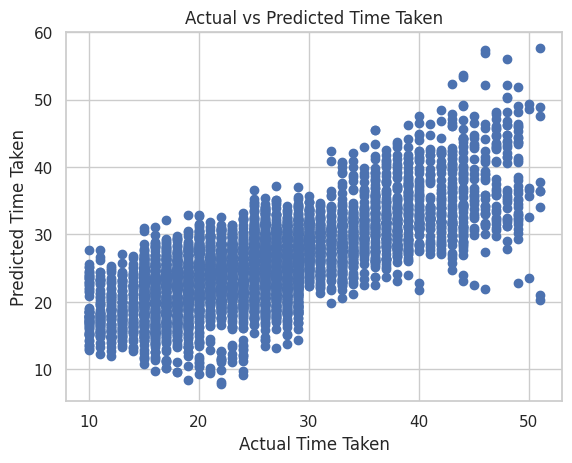

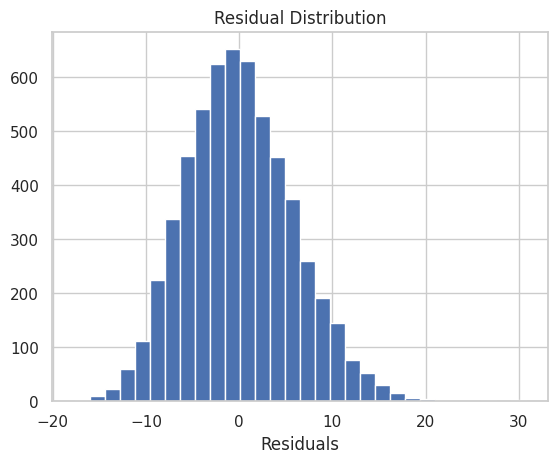

Model saved successfully.
Model loaded successfully.
Training R²: 0.5491664831079113
Test R²: 0.5318720094888885


In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import joblib

# Assuming your dataframe is named df_filtered and all preprocessing has been done.

# Step 1: Define X (features) and y (target)
X = df_filtered[['Distance_km', 'Delivery_Person_Age', 'Vehicle_Condition', 'City_Code',
                 'is_weekend', 'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night',
                 'Weather_Conditions_fog', 'Weather_Conditions_sandstorms', 'Weather_Conditions_stormy',
                 'Weather_Conditions_sunny', 'Weather_Conditions_windy', 'Road_Traffic_Density_jam',
                 'Road_Traffic_Density_low', 'Road_Traffic_Density_medium', 'Multiple_Deliveries_1.0',
                 'Multiple_Deliveries_2.0', 'Multiple_Deliveries_3.0', 'Type_of_Order_drinks',
                 'Type_of_Order_meal', 'Type_of_Order_snack', 'Festival_yes']]

y = df_filtered['Time_Taken (min)']

# Step 2: Check for missing values
print("Missing values in X:\n", X.isnull().sum())
print("Missing values in y:\n", y.isnull().sum())

# Step 3: Drop rows with missing target values
df_filtered = df_filtered.dropna(subset=['Time_Taken (min)'])

# Step 4: Re-define X and y after handling missing values
X = df_filtered[['Distance_km', 'Delivery_Person_Age', 'Vehicle_Condition', 'City_Code',
                 'is_weekend', 'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night',
                 'Weather_Conditions_fog', 'Weather_Conditions_sandstorms', 'Weather_Conditions_stormy',
                 'Weather_Conditions_sunny', 'Weather_Conditions_windy', 'Road_Traffic_Density_jam',
                 'Road_Traffic_Density_low', 'Road_Traffic_Density_medium', 'Multiple_Deliveries_1.0',
                 'Multiple_Deliveries_2.0', 'Multiple_Deliveries_3.0', 'Type_of_Order_drinks',
                 'Type_of_Order_meal', 'Type_of_Order_snack', 'Festival_yes']]

y = df_filtered['Time_Taken (min)']

# Step 5: Check the new shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Step 6: Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Make predictions with the trained model
y_pred = model.predict(X_test)

# Step 9: Evaluate the model using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Step 10: Print evaluation results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Step 11: Perform cross-validation on the Linear Regression model
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cross_val_scores.mean()  # Convert negative MSE to positive
cv_rmse = np.sqrt(cv_mse)

# Step 12: Print cross-validation results
print("Cross-validation MSE:", cv_mse)
print("Cross-validation RMSE:", cv_rmse)

# Step 13: Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cross_val_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Step 14: Compute the mean and standard deviation of the cross-validation MSE for Random Forest
rf_cv_mse = -rf_cross_val_scores.mean()
rf_cv_rmse = np.sqrt(rf_cv_mse)

# Step 15: Print Random Forest evaluation results
print("Random Forest Cross-validation MSE:", rf_cv_mse)
print("Random Forest Cross-validation RMSE:", rf_cv_rmse)

# Step 16: Train an XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_cross_val_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Step 17: Compute the mean and standard deviation of the cross-validation MSE for XGBoost
xgb_cv_mse = -xgb_cross_val_scores.mean()
xgb_cv_rmse = np.sqrt(xgb_cv_mse)

# Step 18: Print XGBoost evaluation results
print("XGBoost Cross-validation MSE:", xgb_cv_mse)
print("XGBoost Cross-validation RMSE:", xgb_cv_rmse)

# Step 19: Plot Actual vs Predicted values (for Linear Regression)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Time Taken")
plt.ylabel("Predicted Time Taken")
plt.title("Actual vs Predicted Time Taken")
plt.show()

# Step 20: Plot residuals (difference between actual and predicted values)
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()

# Step 21: Save the trained model using joblib
try:
    joblib.dump(model, 'delivery_time_predictor.pkl')
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving model: {e}")

# Step 22: Load the saved model
try:
    loaded_model = joblib.load('delivery_time_predictor.pkl')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

# Step 23: Compute R² for both training and test sets
# For training data
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
print("Training R²:", train_r2)

# For test data
y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
print("Test R²:", test_r2)


# Deployment of Model

In [12]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
from datetime import datetime
import joblib

# Load the model
try:
    loaded_model = joblib.load('delivery_time_predictor.pkl')  # Ensure the path to your model file is correct
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

# Helper function to get the time of day
def get_time_of_day(order_time):
    try:
        time = datetime.strptime(order_time, '%I:%M %p')
        if time.hour < 12:
            return 'morning'
        elif 12 <= time.hour < 18:
            return 'afternoon'
        else:
            return 'evening'
    except Exception as e:
        return f"Error parsing time: {e}"

# Widgets for user inputs
order_time_widget = widgets.Text(value='12:30 PM', description='Order Time:', style={'description_width': 'initial'}, layout=widgets.Layout(width='80%'))
distance_widget = widgets.FloatSlider(value=5, min=0, max=20, step=0.1, description='Distance (km):', style={'description_width': 'initial'}, layout=widgets.Layout(width='80%'))
weather_widget = widgets.Dropdown(options=['sunny', 'rainy', 'cloudy'], description='Weather:', style={'description_width': 'initial'}, layout=widgets.Layout(width='80%'))
festival_widget = widgets.Dropdown(options=['yes', 'no'], description='Festival:', style={'description_width': 'initial'}, layout=widgets.Layout(width='80%'))
city_widget = widgets.Dropdown(options={'Chennai': 1, 'Bangalore': 2, 'Mumbai': 3}, description='City:', style={'description_width': 'initial'}, layout=widgets.Layout(width='80%'))
traffic_widget = widgets.Dropdown(options=['low', 'medium', 'jam'], description='Traffic Density:', style={'description_width': 'initial'}, layout=widgets.Layout(width='80%'))
age_widget = widgets.IntSlider(value=30, min=18, max=60, step=1, description='Delivery Age:', style={'description_width': 'initial'}, layout=widgets.Layout(width='80%'))
multiple_widget = widgets.Dropdown(options=['0', '1', '2', '3'], description='Multiple Deliveries:', style={'description_width': 'initial'}, layout=widgets.Layout(width='80%'))
vehicle_widget = widgets.Dropdown(options=['good', 'average', 'bad'], description='Vehicle Condition:', style={'description_width': 'initial'}, layout=widgets.Layout(width='80%'))

# Predict button
predict_button = widgets.Button(description='Predict Delivery Time', layout=widgets.Layout(width='80%'))

# Output area
output = widgets.Output()

# Prediction handler
def predict_handler(b):
    with output:
        output.clear_output()
        try:
            # Collect input values
            time_of_day = get_time_of_day(order_time_widget.value)
            if "Error" in time_of_day:
                print(time_of_day)
                return
            distance = distance_widget.value
            weather = weather_widget.value
            festival = festival_widget.value
            city_code = city_widget.value  # Corrected here
            traffic = traffic_widget.value
            age = age_widget.value
            multiple = int(multiple_widget.value)
            vehicle = vehicle_widget.value
            
            # Prepare raw input data
            raw_data = pd.DataFrame([{
                'Time_of_Day': time_of_day,
                'Distance_km': distance,
                'Weather_Conditions': weather,
                'Festival': festival,
                'City_Code': city_code,
                'Road_Traffic_Density': traffic,
                'Delivery_Person_Age': age,
                'Multiple_Deliveries': multiple,
                'Vehicle_Condition': vehicle
            }])
            
            # Preprocess input data (ensure one-hot encoding and column alignment)
            processed_data = pd.get_dummies(raw_data)
            
            # Align columns to match the model's training data
            model_columns = loaded_model.feature_names_in_
            for col in model_columns:
                if col not in processed_data.columns:
                    processed_data[col] = 0
            processed_data = processed_data[model_columns]
            
            # Make prediction
            prediction = loaded_model.predict(processed_data)
            
            # Display prediction
            print(f"Predicted Delivery Time: {prediction[0]:.2f} minutes")
        except Exception as e:
            print(f"Error during prediction: {e}")

# Attach handler to the button
predict_button.on_click(predict_handler)

# Display the widgets
display(widgets.VBox([
    order_time_widget,
    distance_widget,
    weather_widget,
    festival_widget,
    city_widget,
    traffic_widget,
    age_widget,
    multiple_widget,
    vehicle_widget,
    predict_button,
    output
], layout=widgets.Layout(width='100%')))


Model loaded successfully.
